In [96]:
import pandas as pd

# Load the data from the uploaded Excel file
file_path = 'Data/classification_data.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head()

,Date,Sin(Day of Year),Cos(day of Year),E.coli,Ecoli_Class,Total Area,Agricultural Area,Urban Area,Imperviousness,Elevation,...,max_rain_7_days_lag1,percent_rainy_days_lag1,ema_rain_7_days_lag1,month,season,dry_days_lag1,wet_days_lag1,Antecedent_Wet_Period_lag1,antecedent_dry_period_lag1,Study_Area
0,2007-05-14,0.741222,-0.671260,35,0,5692.68,0.08365,0.675702,0.253804,298.673,...,4.4,0.266667,1.774460,5,2,0,0,0,8,1
1,2007-05-16,0.717677,-0.696376,30,0,5692.68,0.08365,0.675702,0.253804,298.673,...,4.4,0.200000,0.998134,5,2,2,0,0,10,1
2,2007-05-17,0.705584,-0.708627,77,0,5692.68,0.08365,0.675702,0.253804,298.673,...,4.6,0.233333,1.898600,5,2,0,1,1,11,1
3,2007-05-30,0.530730,-0.847541,150,0,5692.68,0.08365,0.675702,0.253804,298.673,...,0.0,0.200000,0.045106,5,2,12,0,0,24,1
4,2007-05-31,0.516062,-0.856551,80,0,5692.68,0.08365,0.675702,0.253804,298.673,...,0.0,0.200000,0.033829,5,2,13,0,0,25,1


In [97]:
# Remove rows with any missing values
df= data.dropna()

df.head()

,Date,Sin(Day of Year),Cos(day of Year),E.coli,Ecoli_Class,Total Area,Agricultural Area,Urban Area,Imperviousness,Elevation,...,max_rain_7_days_lag1,percent_rainy_days_lag1,ema_rain_7_days_lag1,month,season,dry_days_lag1,wet_days_lag1,Antecedent_Wet_Period_lag1,antecedent_dry_period_lag1,Study_Area
0,2007-05-14,0.741222,-0.671260,35,0,5692.68,0.08365,0.675702,0.253804,298.673,...,4.4,0.266667,1.774460,5,2,0,0,0,8,1
1,2007-05-16,0.717677,-0.696376,30,0,5692.68,0.08365,0.675702,0.253804,298.673,...,4.4,0.200000,0.998134,5,2,2,0,0,10,1
2,2007-05-17,0.705584,-0.708627,77,0,5692.68,0.08365,0.675702,0.253804,298.673,...,4.6,0.233333,1.898600,5,2,0,1,1,11,1
3,2007-05-30,0.530730,-0.847541,150,0,5692.68,0.08365,0.675702,0.253804,298.673,...,0.0,0.200000,0.045106,5,2,12,0,0,24,1
4,2007-05-31,0.516062,-0.856551,80,0,5692.68,0.08365,0.675702,0.253804,298.673,...,0.0,0.200000,0.033829,5,2,13,0,0,25,1


In [31]:
import numpy as np

# Drop rows with any missing values
data_cleaned = df.dropna()
#Display the first few rows to confirm the transformation
data_cleaned[['E.coli', 'Ecoli_Class']].head()

,E.coli,Ecoli_Class
0,35,0
1,30,0
2,77,0
3,150,0
4,80,0


In [32]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Select columns for standardization and normalization
features = data_cleaned.columns.difference(['E.coli', 'Ecoli_Class', 'Date'])

In [33]:
features

Index(['Agricultural Area', 'Air Temperature_(T-1)', 'Air Temperature_(T-2)',
       'Air Temperature_(T-3)', 'Antecedent_Wet_Period_lag1',
       'Cos(day of Year)', 'Elevation', 'Gage Height_(T-1)',
       'Gage Height_(T-2)', 'Gage Height_(T-3)', 'Imperviousness',
       'Precipitation_(T-1)', 'Precipitation_(T-2)', 'Relative Humidity_(T-1)',
       'Relative Humidity_(T-2)', 'Sin(Day of Year)', 'Slope',
       'Specific Conductance_(T-2)', 'Specific Conductance_(T-3)',
       'Streamflow_(T-1)', 'Study_Area', 'Topographic Wetness Index',
       'Total Area', 'Turbidity_(T-1)', 'Upstream Tributary Streamflow_(T-1)',
       'Upstream Tributary Streamflow_(T-2)', 'Urban Area',
       'Water Temperature_(T-1)', 'Water Temperature_(T-2)',
       'Water Temperature_(T-3)', 'antecedent_dry_period_lag1',
       'cum_rain_2_days_lag1', 'cum_rain_3_days_lag1', 'cum_rain_4_days_lag1',
       'cum_rain_5_days_lag1', 'cum_rain_6_days_lag1', 'cum_rain_7_days_lag1',
       'dry_days_lag1', 'ema_r

In [34]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
# === Filter Study Areas 1 & 2 and Sort by Date ===
train_test_pool = data_cleaned[data_cleaned['Study_Area'].isin([1, 2])].copy()
train_test_pool['Date'] = pd.to_datetime(train_test_pool['Date'])
train_test_pool = train_test_pool.sort_values('Date')

# === Time-Based Train-Test Split (70/30) ===
split_index = int(len(train_test_pool) * 0.7)
train_set = train_test_pool.iloc[:split_index].copy()
test_set = train_test_pool.iloc[split_index:].copy()

# === Prepare Features and Target for Classification ===
exclude_cols = ['Date', 'E.coli', 'Ecoli_Class']
feature_cols = [col for col in train_set.columns if col not in exclude_cols and np.issubdtype(train_set[col].dtype, np.number)]

X_train = train_set[feature_cols]
X_test = test_set[feature_cols]

# Set classification label
y_train = train_set['Ecoli_Class'].astype(int)
y_test = test_set['Ecoli_Class'].astype(int)

# === Feature Transformations ===

# StandardScaler
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)

# MinMaxScaler
scaler_minmax = MinMaxScaler()
X_train_minmax = scaler_minmax.fit_transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)

# RobustScaler
scaler_robust = RobustScaler()
X_train_robust = scaler_robust.fit_transform(X_train)
X_test_robust = scaler_robust.transform(X_test)

# Log1p Transform
X_train_log1p = np.log1p(X_train.where(X_train >= 0))
X_test_log1p = np.log1p(X_test.where(X_test >= 0))
X_train_log1p = X_train_log1p.replace([np.inf, -np.inf], np.nan).fillna(0)
X_test_log1p = X_test_log1p.replace([np.inf, -np.inf], np.nan).fillna(0)

# Log10 Transform
X_train_log10 = np.log10(X_train.where(X_train > 0))
X_test_log10 = np.log10(X_test.where(X_test > 0))
X_train_log10 = X_train_log10.replace([np.inf, -np.inf], np.nan).fillna(0)
X_test_log10 = X_test_log10.replace([np.inf, -np.inf], np.nan).fillna(0)

# Show shape summary
{
    "Train size": X_train.shape,
    "Test size": X_test.shape,
    "Features used": len(feature_cols)
}

{'Train size': (710, 51), 'Test size': (305, 51), 'Features used': 51}

In [35]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd

# Evaluation function
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, pred_train)
    train_precision = precision_score(y_train, pred_train, average='weighted', zero_division=0)
    train_recall = recall_score(y_train, pred_train, average='weighted', zero_division=0)
    train_f1 = f1_score(y_train, pred_train, average='weighted', zero_division=0)

    test_accuracy = accuracy_score(y_test, pred_test)
    test_precision = precision_score(y_test, pred_test, average='weighted', zero_division=0)
    test_recall = recall_score(y_test, pred_test, average='weighted', zero_division=0)
    test_f1 = f1_score(y_test, pred_test, average='weighted', zero_division=0)

    return {
        'Train Accuracy': train_accuracy,
        'Train Precision': train_precision,
        'Train Recall': train_recall,
        'Train F1': train_f1,
        'Test Accuracy': test_accuracy,
        'Test Precision': test_precision,
        'Test Recall': test_recall,
        'Test F1': test_f1,
    }

# Classifier model instances
xgb_model = XGBClassifier(random_state=42, verbosity=0, use_label_encoder=False)


# Data transformations
transformations = {
    'Standardization': (X_train_std, X_test_std),
    'Normalization': (X_train_minmax, X_test_minmax),
    'Log1p': (X_train_log1p, X_test_log1p),
    'Robust Scaling': (X_train_robust, X_test_robust),
    'Log10': (X_train_log10, X_test_log10)
}

# Initialize results dictionaries
xgb_results = {}

# Evaluate each model
for name, (X_train_trans, X_test_trans) in transformations.items():
   
    xgb_results[name] = evaluate_model(xgb_model, X_train_trans, y_train, X_test_trans, y_test)
   

# Create results DataFrames
xgb_results_df = pd.DataFrame(xgb_results).T

# Display
print("\nXGBoost Results:\n", xgb_results_df)



XGBoost Results:
                  Train Accuracy  Train Precision  Train Recall  Train F1  \
Standardization             1.0              1.0           1.0       1.0   
Normalization               1.0              1.0           1.0       1.0   
Log1p                       1.0              1.0           1.0       1.0   
Robust Scaling              1.0              1.0           1.0       1.0   
Log10                       1.0              1.0           1.0       1.0   

                 Test Accuracy  Test Precision  Test Recall   Test F1  
Standardization       0.773770        0.770385     0.773770  0.770079  
Normalization         0.773770        0.770385     0.773770  0.770079  
Log1p                 0.767213        0.763489     0.767213  0.762795  
Robust Scaling        0.773770        0.770385     0.773770  0.770079  
Log10                 0.783607        0.780751     0.783607  0.780891  


# Best Transformation

In [39]:
# Find and store the best transformation based on 'Test Accuracy'
best_results = {}

for model_name, results_df in [('XGBoost', xgb_results_df)]:
    best_row = results_df.loc[results_df['Test Accuracy'].idxmax()]
    best_results[model_name] = best_row.to_dict() 
    best_results[model_name]['Best Transformation'] = best_row.name  

# Create a DataFrame for best results
best_results_df = pd.DataFrame(best_results).T

# Display the best results
print("Best Model Results (Classification):\n", best_results_df)

Best Model Results (Classification):
         Train Accuracy Train Precision Train Recall Train F1 Test Accuracy  \
XGBoost            1.0             1.0          1.0      1.0      0.783607   

        Test Precision Test Recall   Test F1 Best Transformation  
XGBoost       0.780751    0.783607  0.780891               Log10  


# Hyperparameter tuning on full Dataset Before Forward Selection and Bcakward Elimination

In [37]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import numpy as np

best_score = -float("inf")

for gamma in [0, 0.001, 0.01, 0.1, 0.5, 1, 5, 10]:
    for learning_rate in [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7]:
        for max_depth in [3, 5, 7, 10]:
            for subsample in [0.8, 1.0]:
                for n_estimators in [50, 100, 200, 300]:
                    model = XGBClassifier(
                        gamma=gamma,
                        learning_rate=learning_rate,
                        max_depth=max_depth,
                        subsample=subsample,
                        n_estimators=n_estimators,
                        objective='binary:logistic', 
                        n_jobs=-1,
                        random_state=42
                    )

                    model.fit(X_train_log10, y_train)
                    y_pred = model.predict(X_test_log10)
                    score = accuracy_score(y_test, y_pred)

                    if score > best_score:
                        best_score = score
                        best_model = model
                        best_params = {
                            'gamma': gamma,
                            'learning_rate': learning_rate,
                            'max_depth': max_depth,
                            'subsample': subsample,
                            'n_estimators': n_estimators
                        }

print("✅ Best Accuracy Score: {:.4f}".format(best_score))
print("✅ Best Parameters:", best_params)

y_pred_best = best_model.predict(X_test_log10)
print("Precision:", precision_score(y_test, y_pred_best))
print("Recall:", recall_score(y_test, y_pred_best))
print("F1 Score:", f1_score(y_test, y_pred_best))


✅ Best Accuracy Score: 0.7934
✅ Best Parameters: {'gamma': 0, 'learning_rate': 0.3, 'max_depth': 10, 'subsample': 1.0, 'n_estimators': 100}
Precision: 0.7475728155339806
Recall: 0.6754385964912281
F1 Score: 0.7096774193548387


# Forward Selection 

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.exceptions import UndefinedMetricWarning
from collections import Counter
import warnings
import numpy as np

# === Suppress precision warnings from sklearn ===
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# === Handle class imbalance ===
class_counts = Counter(y_train)
scale_weight = class_counts[0] / class_counts[1]

# === Initialize ===
best_f1 = -float("inf")
best_feature_subset = []
selected_features = []

print("\n🔍 Starting Forward Feature Selection (with unsafe prediction enforcement):\n")

# === Forward Feature Selection Loop ===
for num_features in range(1, len(feature_cols) + 1):
    print(f"Trying subsets of {num_features} features:")
    best_feature_this_round = None

    for feature in set(feature_cols) - set(selected_features):
        current_subset = selected_features + [feature]

        Xtrain_subset = X_train_log10[current_subset]
        Xtest_subset = X_test_log10[current_subset]

        model = XGBClassifier(
            objective='binary:logistic',
            scale_pos_weight=scale_weight,
            n_jobs=-1,
            random_state=42
        )
        model.fit(Xtrain_subset, y_train)
        y_pred = model.predict(Xtest_subset)

        # === Ensure class 1 is being predicted ===
        if 1 not in y_pred:
            print(f"⚠️ Skipping {current_subset} — did not predict any unsafe samples (class 1).")
            continue  # skip this feature subset

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        if f1 > best_f1:
            best_f1 = f1
            best_feature_subset = current_subset
            best_feature_this_round = feature
            best_metrics = {
                'accuracy': acc,
                'precision': prec,
                'recall': rec,
                'f1_score': f1,
                'predicted_distribution': dict(Counter(y_pred))
            }

    if best_feature_this_round:
        selected_features = best_feature_subset

    print("✅ Best F1-score so far: {:.4f}".format(best_f1))
    print("✅ Current best subset:", best_feature_subset, "\n")

# === Final Report ===
print("🎯 Final Best Subset:", best_feature_subset)
print("🎯 Final Metrics:")
for k, v in best_metrics.items():
    if k == 'predicted_distribution':
        print("Predicted Class Distribution:", v)
    else:
        print(f"{k.capitalize()}: {v:.4f}")



🔍 Starting Forward Feature Selection (with unsafe prediction enforcement):

Trying subsets of 1 features:
✅ Best F1-score so far: 0.6330
✅ Current best subset: ['Upstream Tributary Streamflow_(T-1)'] 

Trying subsets of 2 features:
✅ Best F1-score so far: 0.6880
✅ Current best subset: ['Upstream Tributary Streamflow_(T-1)', 'Air Temperature_(T-3)'] 

Trying subsets of 3 features:
✅ Best F1-score so far: 0.6996
✅ Current best subset: ['Upstream Tributary Streamflow_(T-1)', 'Air Temperature_(T-3)', 'relative_mutual_information'] 

Trying subsets of 4 features:
✅ Best F1-score so far: 0.7149
✅ Current best subset: ['Upstream Tributary Streamflow_(T-1)', 'Air Temperature_(T-3)', 'relative_mutual_information', 'month'] 

Trying subsets of 5 features:
✅ Best F1-score so far: 0.7232
✅ Current best subset: ['Upstream Tributary Streamflow_(T-1)', 'Air Temperature_(T-3)', 'relative_mutual_information', 'month', 'rainfall_anomaly_lag1'] 

Trying subsets of 6 features:
✅ Best F1-score so far: 0.7

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from collections import Counter
import numpy as np

# === Final selected features ===
final_features = ['Upstream Tributary Streamflow_(T-1)', 'Air Temperature_(T-3)', 'relative_mutual_information', 'month', 'rainfall_anomaly_lag1',
                  'season']

# === Prepare training/testing sets ===
Xtrain = X_train_log10[final_features]
Xtest = X_test_log10[final_features]

# === Compute class imbalance weight ===
class_counts = Counter(y_train)
scale_weight = class_counts[0] / class_counts[1]

# === Grid search setup ===
best_f1 = -float("inf")
best_model = None
best_params = None
best_metrics = {}

print("\n🔍 Starting Grid Search (ignoring models that don't predict unsafe class):\n")

for gamma in [0, 0.001, 0.01, 0.1, 0.5, 1, 5, 10]:
    for learning_rate in [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7]:
        for max_depth in [3, 5, 7, 10]:
            for subsample in [0.8, 1.0]:
                for n_estimators in [50, 100, 200, 300]:
                    model = XGBClassifier(
                        gamma=gamma,
                        learning_rate=learning_rate,
                        max_depth=max_depth,
                        subsample=subsample,
                        n_estimators=n_estimators,
                        objective='binary:logistic',
                        scale_pos_weight=scale_weight,
                        n_jobs=-1,
                        random_state=42
                    )

                    model.fit(Xtrain, y_train)
                    y_pred = model.predict(Xtest)

                    # Skip model if it predicts no unsafe cases
                    if 1 not in y_pred:
                        print(f"⚠️ Skipping: no unsafe (class 1) predicted for params: "
                              f"gamma={gamma}, lr={learning_rate}, depth={max_depth}, "
                              f"subsample={subsample}, n_estimators={n_estimators}")
                        continue

                    acc = accuracy_score(y_test, y_pred)
                    prec = precision_score(y_test, y_pred, zero_division=0)
                    rec = recall_score(y_test, y_pred)
                    f1 = f1_score(y_test, y_pred)

                    if f1 > best_f1:
                        best_f1 = f1
                        best_model = model
                        best_params = {
                            'gamma': gamma,
                            'learning_rate': learning_rate,
                            'max_depth': max_depth,
                            'subsample': subsample,
                            'n_estimators': n_estimators
                        }
                        best_metrics = {
                            'accuracy': acc,
                            'precision': prec,
                            'recall': rec,
                            'f1_score': f1,
                            'predicted_distribution': dict(Counter(y_pred))
                        }

# === Final Output ===
print("\n✅ Best Model Found!")
print("Best F1 Score: {:.4f}".format(best_f1))
print("Best Parameters:", best_params)
print("Final Metrics:")
for k, v in best_metrics.items():
    if k == 'predicted_distribution':
        print("Predicted Class Distribution:", v)
    else:
        print(f"{k.capitalize()}: {v:.4f}")



🔍 Starting Grid Search (ignoring models that don't predict unsafe class):


✅ Best Model Found!
Best F1 Score: 0.8051
Best Parameters: {'gamma': 0.5, 'learning_rate': 0.5, 'max_depth': 3, 'subsample': 0.8, 'n_estimators': 50}
Final Metrics:
Accuracy: 0.8492
Precision: 0.7787
Recall: 0.8333
F1_score: 0.8051
Predicted Class Distribution: {1: 122, 0: 183}


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from collections import Counter

# === Final features ===
final_features = ['Upstream Tributary Streamflow_(T-1)', 'Air Temperature_(T-3)', 'relative_mutual_information', 'month', 'rainfall_anomaly_lag1',
                  'season']
# === Prepare data ===
Xtrain = X_train_log10[final_features]
Xtest = X_test_log10[final_features]
Ytrain = y_train
Ytest = y_test

# === Handle class imbalance ===
from collections import Counter
counts = Counter(Ytrain)
scale_weight = counts[0] / counts[1]

# === Train classification model ===
model = XGBClassifier(
    gamma=0.5,
    learning_rate=0.5,
    max_depth=3,
    subsample=0.8,
    n_estimators=50,
    scale_pos_weight=scale_weight,
    objective='binary:logistic',
    random_state=42,
    n_jobs=-1
)

model.fit(Xtrain, Ytrain)

# === Predictions ===
y_pred_train = model.predict(Xtrain)
y_pred_test = model.predict(Xtest)

# === Metrics ===
def report(true, pred, title):
    acc = accuracy_score(true, pred)
    prec = precision_score(true, pred, zero_division=0)
    rec = recall_score(true, pred)
    f1 = f1_score(true, pred)
    cm = confusion_matrix(true, pred)
    dist = dict(Counter(pred))

    print(f"\n📊 {title}")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1 Score : {f1:.4f}")
    print("Confusion Matrix:\n", cm)
    print("Predicted Class Distribution:", dist)

report(Ytrain, y_pred_train, "Train Set Evaluation")
report(Ytest, y_pred_test, "Test Set Evaluation")



📊 Train Set Evaluation
Accuracy : 0.9662
Precision: 0.8519
Recall   : 1.0000
F1 Score : 0.9200
Confusion Matrix:
 [[548  24]
 [  0 138]]
Predicted Class Distribution: {0: 548, 1: 162}

📊 Test Set Evaluation
Accuracy : 0.8492
Precision: 0.7787
Recall   : 0.8333
F1 Score : 0.8051
Confusion Matrix:
 [[164  27]
 [ 19  95]]
Predicted Class Distribution: {1: 122, 0: 183}


# Forward selection XGBOOST(+)

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.exceptions import UndefinedMetricWarning
from collections import Counter
import warnings
import numpy as np

# === Suppress precision warnings from sklearn ===
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# === Handle class imbalance ===
class_counts = Counter(y_train)
scale_weight = class_counts[0] / class_counts[1]

# === Initialize ===
best_f1 = -float("inf")
best_feature_subset = []
selected_features = []

print("\n🔍 Starting Forward Feature Selection (with unsafe prediction enforcement):\n")

# === Forward Feature Selection Loop ===
for num_features in range(1, len(feature_cols) + 1):
    print(f"Trying subsets of {num_features} features:")
    best_feature_this_round = None

    for feature in set(feature_cols) - set(selected_features):
        current_subset = selected_features + [feature]

        Xtrain_subset = X_train_log10[current_subset]
        Xtest_subset = X_test_log10[current_subset]

        model = XGBClassifier(
            gamma=0.5,
            learning_rate=0.5,
            max_depth=3,
            subsample=0.8,
            n_estimators=50,
            objective='binary:logistic',
            scale_pos_weight=scale_weight,
            n_jobs=-1,
            random_state=42
        )
        model.fit(Xtrain_subset, y_train)
        y_pred = model.predict(Xtest_subset)

        # === Ensure class 1 is being predicted ===
        if 1 not in y_pred:
            print(f"⚠️ Skipping {current_subset} — did not predict any unsafe samples (class 1).")
            continue  # skip this feature subset

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        if f1 > best_f1:
            best_f1 = f1
            best_feature_subset = current_subset
            best_feature_this_round = feature
            best_metrics = {
                'accuracy': acc,
                'precision': prec,
                'recall': rec,
                'f1_score': f1,
                'predicted_distribution': dict(Counter(y_pred))
            }

    if best_feature_this_round:
        selected_features = best_feature_subset

    print("✅ Best F1-score so far: {:.4f}".format(best_f1))
    print("✅ Current best subset:", best_feature_subset, "\n")

# === Final Report ===
print("🎯 Final Best Subset:", best_feature_subset)
print("🎯 Final Metrics:")
for k, v in best_metrics.items():
    if k == 'predicted_distribution':
        print("Predicted Class Distribution:", v)
    else:
        print(f"{k.capitalize()}: {v:.4f}")



🔍 Starting Forward Feature Selection (with unsafe prediction enforcement):

Trying subsets of 1 features:
✅ Best F1-score so far: 0.6523
✅ Current best subset: ['Upstream Tributary Streamflow_(T-1)'] 

Trying subsets of 2 features:
✅ Best F1-score so far: 0.7041
✅ Current best subset: ['Upstream Tributary Streamflow_(T-1)', 'Air Temperature_(T-1)'] 

Trying subsets of 3 features:
✅ Best F1-score so far: 0.7149
✅ Current best subset: ['Upstream Tributary Streamflow_(T-1)', 'Air Temperature_(T-1)', 'rainfall_anomaly_lag1'] 

Trying subsets of 4 features:
✅ Best F1-score so far: 0.7386
✅ Current best subset: ['Upstream Tributary Streamflow_(T-1)', 'Air Temperature_(T-1)', 'rainfall_anomaly_lag1', 'Turbidity_(T-1)'] 

Trying subsets of 5 features:
✅ Best F1-score so far: 0.7386
✅ Current best subset: ['Upstream Tributary Streamflow_(T-1)', 'Air Temperature_(T-1)', 'rainfall_anomaly_lag1', 'Turbidity_(T-1)'] 

Trying subsets of 6 features:
✅ Best F1-score so far: 0.7386
✅ Current best subs

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from collections import Counter
import numpy as np

# === Final selected features ===
final_features = ['Upstream Tributary Streamflow_(T-1)', 'Air Temperature_(T-1)', 'rainfall_anomaly_lag1', 'Turbidity_(T-1)']

# === Prepare training/testing sets ===
Xtrain = X_train_log10[final_features]
Xtest = X_test_log10[final_features]

# === Compute class imbalance weight ===
class_counts = Counter(y_train)
scale_weight = class_counts[0] / class_counts[1]

# === Grid search setup ===
best_f1 = -float("inf")
best_model = None
best_params = None
best_metrics = {}

print("\n🔍 Starting Grid Search (ignoring models that don't predict unsafe class):\n")

for gamma in [2,3,4,5,6,7,8,9]:
    for learning_rate in [0.3, 0.4]:
        for max_depth in [4,5,6]:
            for subsample in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8, 1.0]:
                for n_estimators in [150,170,200,220,250]:
                    model = XGBClassifier(
                        gamma=gamma,
                        learning_rate=learning_rate,
                        max_depth=max_depth,
                        subsample=subsample,
                        n_estimators=n_estimators,
                        objective='binary:logistic',
                        scale_pos_weight=scale_weight,
                        n_jobs=-1,
                        random_state=42
                    )

                    model.fit(Xtrain, y_train)
                    y_pred = model.predict(Xtest)

                    # Skip model if it predicts no unsafe cases
                    if 1 not in y_pred:
                        print(f"⚠️ Skipping: no unsafe (class 1) predicted for params: "
                              f"gamma={gamma}, lr={learning_rate}, depth={max_depth}, "
                              f"subsample={subsample}, n_estimators={n_estimators}")
                        continue

                    acc = accuracy_score(y_test, y_pred)
                    prec = precision_score(y_test, y_pred, zero_division=0)
                    rec = recall_score(y_test, y_pred)
                    f1 = f1_score(y_test, y_pred)

                    if f1 > best_f1:
                        best_f1 = f1
                        best_model = model
                        best_params = {
                            'gamma': gamma,
                            'learning_rate': learning_rate,
                            'max_depth': max_depth,
                            'subsample': subsample,
                            'n_estimators': n_estimators
                        }
                        best_metrics = {
                            'accuracy': acc,
                            'precision': prec,
                            'recall': rec,
                            'f1_score': f1,
                            'predicted_distribution': dict(Counter(y_pred))
                        }

# === Final Output ===
print("\n✅ Best Model Found!")
print("Best F1 Score: {:.4f}".format(best_f1))
print("Best Parameters:", best_params)
print("Final Metrics:")
for k, v in best_metrics.items():
    if k == 'predicted_distribution':
        print("Predicted Class Distribution:", v)
    else:
        print(f"{k.capitalize()}: {v:.4f}")



🔍 Starting Grid Search (ignoring models that don't predict unsafe class):


✅ Best Model Found!
Best F1 Score: 0.7816
Best Parameters: {'gamma': 8, 'learning_rate': 0.3, 'max_depth': 5, 'subsample': 0.4, 'n_estimators': 150}
Final Metrics:
Accuracy: 0.8131
Precision: 0.6939
Recall: 0.8947
F1_score: 0.7816
Predicted Class Distribution: {1: 147, 0: 158}


In [95]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from collections import Counter

# === Final features ===
final_features = ['Upstream Tributary Streamflow_(T-1)', 'Air Temperature_(T-1)', 'rainfall_anomaly_lag1', 'Turbidity_(T-1)']
# === Prepare data ===
Xtrain = X_train_log10[final_features]
Xtest = X_test_log10[final_features]
Ytrain = y_train
Ytest = y_test

# === Handle class imbalance ===
from collections import Counter
counts = Counter(Ytrain)
scale_weight = counts[0] / counts[1]

# === Train classification model ===
model = XGBClassifier(
    gamma=8,
    learning_rate=0.3,
    max_depth=5,
    subsample=0.4,
    n_estimators=150,
    scale_pos_weight=scale_weight,
    objective='binary:logistic',
    random_state=42,
    n_jobs=-1
)

model.fit(Xtrain, Ytrain)

# === Predictions ===
y_pred_train = model.predict(Xtrain)
y_pred_test = model.predict(Xtest)

# === Metrics ===
def report(true, pred, title):
    acc = accuracy_score(true, pred)
    prec = precision_score(true, pred, zero_division=0)
    rec = recall_score(true, pred)
    f1 = f1_score(true, pred)
    cm = confusion_matrix(true, pred)
    dist = dict(Counter(pred))

    print(f"\n {title}")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1 Score : {f1:.4f}")
    print("Confusion Matrix:\n", cm)
    print("Predicted Class Distribution:", dist)

report(Ytrain, y_pred_train, "Train Set Evaluation")
report(Ytest, y_pred_test, "Test Set Evaluation")



 Train Set Evaluation
Accuracy : 0.9225
Precision: 0.7427
Recall   : 0.9203
F1 Score : 0.8220
Confusion Matrix:
 [[528  44]
 [ 11 127]]
Predicted Class Distribution: {0: 539, 1: 171}

 Test Set Evaluation
Accuracy : 0.8131
Precision: 0.6939
Recall   : 0.8947
F1 Score : 0.7816
Confusion Matrix:
 [[146  45]
 [ 12 102]]
Predicted Class Distribution: {1: 147, 0: 158}


# Backward Elimination 

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from collections import Counter
import numpy as np

# === Set up full feature set ===
features = X_train_log10.columns.tolist()
Xtrain = X_train_log10[features]
Xtest = X_test_log10[features]
Ytrain = y_train
Ytest = y_test

# === Handle class imbalance ===
from collections import Counter
class_counts = Counter(Ytrain)
scale_weight = class_counts[0] / class_counts[1]

# === Initialize sets ===
all_features = set(features)
selected_features = all_features.copy()
best_f1 = -np.inf
best_feature_subset = selected_features.copy()

print("\n🔁 Starting Backward Feature Elimination (Classification)\n")

for num_features in range(len(features), 0, -1):
    print(f"Trying subsets of {num_features} features:")
    current_features = selected_features.copy()

    for feature in current_features:
        # Try removing this feature
        current_subset = selected_features if (len(selected_features) == len(all_features) and num_features == len(features)) else selected_features - {feature}

        Xtrain_subset = Xtrain[list(current_subset)]
        Xtest_subset = Xtest[list(current_subset)]

        model = XGBClassifier(
            objective='binary:logistic',
            scale_pos_weight=scale_weight,
            random_state=42,
            n_jobs=-1
        )

        model.fit(Xtrain_subset, Ytrain)
        y_pred = model.predict(Xtest_subset)

        # Skip if no class 1 is predicted
        if 1 not in y_pred:
            print(f"⚠️ Skipping: did not predict any unsafe (class 1) using features {len(current_subset)}.")
            continue

        f1 = f1_score(Ytest, y_pred)

        if f1 > best_f1:
            best_f1 = f1
            best_feature_subset = current_subset.copy()
            best_metrics = {
                'accuracy': accuracy_score(Ytest, y_pred),
                'precision': precision_score(Ytest, y_pred, zero_division=0),
                'recall': recall_score(Ytest, y_pred),
                'f1_score': f1,
                'predicted_distribution': dict(Counter(y_pred))
            }

    selected_features = best_feature_subset.copy()
    print("✅ Best F1: {:.4f}".format(best_f1))
    print("✅ Best feature subset:", best_feature_subset)

# === Final Output ===
print("\n🎯 Final Feature Subset:", best_feature_subset)
print("🎯 Final Metrics:")
for k, v in best_metrics.items():
    if k == 'predicted_distribution':
        print("Predicted Class Distribution:", v)
    else:
        print(f"{k.capitalize()}: {v:.4f}")



🔁 Starting Backward Feature Elimination (Classification)

Trying subsets of 51 features:
✅ Best F1: 0.6840
✅ Best feature subset: {'Water Temperature_(T-3)', 'cum_rain_5_days_lag1', 'Sin(Day of Year)', 'entropy', 'Air Temperature_(T-3)', 'Water Temperature_(T-1)', 'euclidean_nearest_neighbor_mn', 'Gage Height_(T-3)', 'max_rain_7_days_lag1', 'Elevation', 'seasonal_rainfall_deviation_lag1', 'Water Temperature_(T-2)', 'Upstream Tributary Streamflow_(T-1)', 'rainfall_anomaly_lag1', 'Study_Area', 'Upstream Tributary Streamflow_(T-2)', 'Topographic Wetness Index', 'Precipitation_(T-2)', 'cum_rain_2_days_lag1', 'Urban Area', 'Specific Conductance_(T-3)', 'Total Area', 'Cos(day of Year)', 'antecedent_dry_period_lag1', 'relative_mutual_information', 'Relative Humidity_(T-2)', 'Gage Height_(T-1)', 'Imperviousness', 'cum_rain_7_days_lag1', 'Slope', 'Turbidity_(T-1)', 'ema_rain_7_days_lag1', 'percent_rainy_days_lag1', 'season', 'Precipitation_(T-1)', 'dry_days_lag1', 'shannon_diversity_index', 'A

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from collections import Counter
import numpy as np

# === Final selected features ===
final_features = ['Water Temperature_(T-3)', 'cum_rain_5_days_lag1', 'Sin(Day of Year)', 'entropy', 'Air Temperature_(T-3)', 'Water Temperature_(T-1)',
                  'euclidean_nearest_neighbor_mn', 'Gage Height_(T-3)', 'max_rain_7_days_lag1', 'Elevation', 'seasonal_rainfall_deviation_lag1',
                  'Water Temperature_(T-2)', 'Upstream Tributary Streamflow_(T-1)', 'rainfall_anomaly_lag1', 'Study_Area',
                  'Upstream Tributary Streamflow_(T-2)', 'Topographic Wetness Index', 'Precipitation_(T-2)', 'cum_rain_2_days_lag1', 'Urban Area',
                  'Specific Conductance_(T-3)', 'Total Area', 'Cos(day of Year)', 'antecedent_dry_period_lag1', 'relative_mutual_information',
                  'Relative Humidity_(T-2)', 'Gage Height_(T-1)', 'Imperviousness', 'cum_rain_7_days_lag1', 'Slope', 'Turbidity_(T-1)',
                  'ema_rain_7_days_lag1', 'percent_rainy_days_lag1', 'season', 'Precipitation_(T-1)', 'dry_days_lag1', 'shannon_diversity_index', 
                  'Air Temperature_(T-2)', 'mutual_information', 'Specific Conductance_(T-2)', 'wet_days_lag1', 'Streamflow_(T-1)', 
                  'cum_rain_6_days_lag1', 'Antecedent_Wet_Period_lag1', 'month', 'Agricultural Area', 'Relative Humidity_(T-1)', 'cum_rain_4_days_lag1',
                  'cum_rain_3_days_lag1', 'Air Temperature_(T-1)']

# === Prepare training/testing sets ===
Xtrain = X_train_log10[final_features]
Xtest = X_test_log10[final_features]

# === Compute class imbalance weight ===
class_counts = Counter(y_train)
scale_weight = class_counts[0] / class_counts[1]

# === Grid search setup ===
best_f1 = -float("inf")
best_model = None
best_params = None
best_metrics = {}

print("\n🔍 Starting Grid Search (ignoring models that don't predict unsafe class):\n")

for gamma in [2,3,4,5,6,7,8,9]:
    for learning_rate in [0.3, 0.4]:
        for max_depth in [4,5,6]:
            for subsample in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8, 1.0]:
                for n_estimators in [150,170,200,220,250]:
                    model = XGBClassifier(
                        gamma=gamma,
                        learning_rate=learning_rate,
                        max_depth=max_depth,
                        subsample=subsample,
                        n_estimators=n_estimators,
                        objective='binary:logistic',
                        scale_pos_weight=scale_weight,
                        n_jobs=-1,
                        random_state=42
                    )

                    model.fit(Xtrain, y_train)
                    y_pred = model.predict(Xtest)

                    # Skip model if it predicts no unsafe cases
                    if 1 not in y_pred:
                        print(f"⚠️ Skipping: no unsafe (class 1) predicted for params: "
                              f"gamma={gamma}, lr={learning_rate}, depth={max_depth}, "
                              f"subsample={subsample}, n_estimators={n_estimators}")
                        continue

                    acc = accuracy_score(y_test, y_pred)
                    prec = precision_score(y_test, y_pred, zero_division=0)
                    rec = recall_score(y_test, y_pred)
                    f1 = f1_score(y_test, y_pred)

                    if f1 > best_f1:
                        best_f1 = f1
                        best_model = model
                        best_params = {
                            'gamma': gamma,
                            'learning_rate': learning_rate,
                            'max_depth': max_depth,
                            'subsample': subsample,
                            'n_estimators': n_estimators
                        }
                        best_metrics = {
                            'accuracy': acc,
                            'precision': prec,
                            'recall': rec,
                            'f1_score': f1,
                            'predicted_distribution': dict(Counter(y_pred))
                        }

# === Final Output ===
print("\n✅ Best Model Found!")
print("Best F1 Score: {:.4f}".format(best_f1))
print("Best Parameters:", best_params)
print("Final Metrics:")
for k, v in best_metrics.items():
    if k == 'predicted_distribution':
        print("Predicted Class Distribution:", v)
    else:
        print(f"{k.capitalize()}: {v:.4f}")



🔍 Starting Grid Search (ignoring models that don't predict unsafe class):


✅ Best Model Found!
Best F1 Score: 0.7597
Best Parameters: {'gamma': 9, 'learning_rate': 0.3, 'max_depth': 6, 'subsample': 0.6, 'n_estimators': 220}
Final Metrics:
Accuracy: 0.7967
Precision: 0.6806
Recall: 0.8596
F1_score: 0.7597
Predicted Class Distribution: {1: 144, 0: 161}


# Backward Elemination (+)

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from collections import Counter
import numpy as np

# === Set up full feature set ===
features = X_train_log10.columns.tolist()
Xtrain = X_train_log10[features]
Xtest = X_test_log10[features]
Ytrain = y_train
Ytest = y_test

# === Handle class imbalance ===
from collections import Counter
class_counts = Counter(Ytrain)
scale_weight = class_counts[0] / class_counts[1]

# === Initialize sets ===
all_features = set(features)
selected_features = all_features.copy()
best_f1 = -np.inf
best_feature_subset = selected_features.copy()

print("\n🔁 Starting Backward Feature Elimination (Classification)\n")

for num_features in range(len(features), 0, -1):
    print(f"Trying subsets of {num_features} features:")
    current_features = selected_features.copy()

    for feature in current_features:
        # Try removing this feature
        current_subset = selected_features if (len(selected_features) == len(all_features) and num_features == len(features)) else selected_features - {feature}

        Xtrain_subset = Xtrain[list(current_subset)]
        Xtest_subset = Xtest[list(current_subset)]

        model = XGBClassifier(
            gamma=9,
            learning_rate=0.3,
            max_depth=6,
            subsample=0.6,
            n_estimators=220,
            objective='binary:logistic',
            scale_pos_weight=scale_weight,
            random_state=42,
            n_jobs=-1
        )

        model.fit(Xtrain_subset, Ytrain)
        y_pred = model.predict(Xtest_subset)

        # Skip if no class 1 is predicted
        if 1 not in y_pred:
            print(f"⚠️ Skipping: did not predict any unsafe (class 1) using features {len(current_subset)}.")
            continue

        f1 = f1_score(Ytest, y_pred)

        if f1 > best_f1:
            best_f1 = f1
            best_feature_subset = current_subset.copy()
            best_metrics = {
                'accuracy': accuracy_score(Ytest, y_pred),
                'precision': precision_score(Ytest, y_pred, zero_division=0),
                'recall': recall_score(Ytest, y_pred),
                'f1_score': f1,
                'predicted_distribution': dict(Counter(y_pred))
            }

    selected_features = best_feature_subset.copy()
    print("✅ Best F1: {:.4f}".format(best_f1))
    print("✅ Best feature subset:", best_feature_subset)

# === Final Output ===
print("\n🎯 Final Feature Subset:", best_feature_subset)
print("🎯 Final Metrics:")
for k, v in best_metrics.items():
    if k == 'predicted_distribution':
        print("Predicted Class Distribution:", v)
    else:
        print(f"{k.capitalize()}: {v:.4f}")



🔁 Starting Backward Feature Elimination (Classification)

Trying subsets of 51 features:
✅ Best F1: 0.7059
✅ Best feature subset: {'cum_rain_5_days_lag1', 'Imperviousness', 'rainfall_anomaly_lag1', 'Upstream Tributary Streamflow_(T-1)', 'shannon_diversity_index', 'Specific Conductance_(T-3)', 'Turbidity_(T-1)', 'entropy', 'Relative Humidity_(T-1)', 'cum_rain_3_days_lag1', 'ema_rain_7_days_lag1', 'Air Temperature_(T-1)', 'cum_rain_2_days_lag1', 'Water Temperature_(T-2)', 'Study_Area', 'Topographic Wetness Index', 'Precipitation_(T-1)', 'Water Temperature_(T-3)', 'Upstream Tributary Streamflow_(T-2)', 'Elevation', 'Air Temperature_(T-2)', 'Streamflow_(T-1)', 'relative_mutual_information', 'mutual_information', 'cum_rain_6_days_lag1', 'Specific Conductance_(T-2)', 'Air Temperature_(T-3)', 'cum_rain_4_days_lag1', 'euclidean_nearest_neighbor_mn', 'max_rain_7_days_lag1', 'cum_rain_7_days_lag1', 'wet_days_lag1', 'Agricultural Area', 'Relative Humidity_(T-2)', 'Total Area', 'month', 'Water Te

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from collections import Counter
import numpy as np

# === Final selected features ===
final_features = ['cum_rain_5_days_lag1', 'Imperviousness', 'rainfall_anomaly_lag1', 'Upstream Tributary Streamflow_(T-1)', 'shannon_diversity_index', 
                  'Specific Conductance_(T-3)', 'Turbidity_(T-1)', 'entropy', 'Relative Humidity_(T-1)', 'cum_rain_3_days_lag1', 'ema_rain_7_days_lag1',
                  'Air Temperature_(T-1)', 'cum_rain_2_days_lag1', 'Study_Area', 'Topographic Wetness Index', 'Water Temperature_(T-3)', 
                  'Upstream Tributary Streamflow_(T-2)', 'Elevation', 'Air Temperature_(T-2)', 'Streamflow_(T-1)', 'relative_mutual_information',
                  'mutual_information', 'cum_rain_6_days_lag1', 'Specific Conductance_(T-2)', 'Air Temperature_(T-3)', 'cum_rain_4_days_lag1',
                  'euclidean_nearest_neighbor_mn', 'max_rain_7_days_lag1', 'cum_rain_7_days_lag1', 'wet_days_lag1', 'Agricultural Area', 'Total Area',
                  'month', 'Water Temperature_(T-1)', 'Urban Area', 'Gage Height_(T-1)', 'season', 'Antecedent_Wet_Period_lag1', 'Sin(Day of Year)',
                  'dry_days_lag1', 'antecedent_dry_period_lag1', 'percent_rainy_days_lag1', 'Precipitation_(T-2)', 'Cos(day of Year)', 
                  'Gage Height_(T-2)', 'seasonal_rainfall_deviation_lag1', 'Slope']

# === Prepare training/testing sets ===
Xtrain = X_train_log10[final_features]
Xtest = X_test_log10[final_features]

# === Compute class imbalance weight ===
class_counts = Counter(y_train)
scale_weight = class_counts[0] / class_counts[1]

# === Grid search setup ===
best_f1 = -float("inf")
best_model = None
best_params = None
best_metrics = {}

print("\n🔍 Starting Grid Search (ignoring models that don't predict unsafe class):\n")

for gamma in [2,3,4,5,6,7,8,9]:
    for learning_rate in [0.3, 0.4]:
        for max_depth in [4,5,6]:
            for subsample in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8, 1.0]:
                for n_estimators in [150,170,200,220,250]:
                    model = XGBClassifier(
                        gamma=gamma,
                        learning_rate=learning_rate,
                        max_depth=max_depth,
                        subsample=subsample,
                        n_estimators=n_estimators,
                        objective='binary:logistic',
                        scale_pos_weight=scale_weight,
                        n_jobs=-1,
                        random_state=42
                    )

                    model.fit(Xtrain, y_train)
                    y_pred = model.predict(Xtest)

                    # Skip model if it predicts no unsafe cases
                    if 1 not in y_pred:
                        print(f"⚠️ Skipping: no unsafe (class 1) predicted for params: "
                              f"gamma={gamma}, lr={learning_rate}, depth={max_depth}, "
                              f"subsample={subsample}, n_estimators={n_estimators}")
                        continue

                    acc = accuracy_score(y_test, y_pred)
                    prec = precision_score(y_test, y_pred, zero_division=0)
                    rec = recall_score(y_test, y_pred)
                    f1 = f1_score(y_test, y_pred)

                    if f1 > best_f1:
                        best_f1 = f1
                        best_model = model
                        best_params = {
                            'gamma': gamma,
                            'learning_rate': learning_rate,
                            'max_depth': max_depth,
                            'subsample': subsample,
                            'n_estimators': n_estimators
                        }
                        best_metrics = {
                            'accuracy': acc,
                            'precision': prec,
                            'recall': rec,
                            'f1_score': f1,
                            'predicted_distribution': dict(Counter(y_pred))
                        }

# === Final Output ===
print("\n✅ Best Model Found!")
print("Best F1 Score: {:.4f}".format(best_f1))
print("Best Parameters:", best_params)
print("Final Metrics:")
for k, v in best_metrics.items():
    if k == 'predicted_distribution':
        print("Predicted Class Distribution:", v)
    else:
        print(f"{k.capitalize()}: {v:.4f}")



🔍 Starting Grid Search (ignoring models that don't predict unsafe class):


✅ Best Model Found!
Best F1 Score: 0.7668
Best Parameters: {'gamma': 9, 'learning_rate': 0.3, 'max_depth': 6, 'subsample': 0.6, 'n_estimators': 200}
Final Metrics:
Accuracy: 0.8066
Precision: 0.6978
Recall: 0.8509
F1_score: 0.7668
Predicted Class Distribution: {1: 139, 0: 166}


# Best score

In [94]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from collections import Counter
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.exceptions import UndefinedMetricWarning
from collections import Counter
import warnings
import numpy as np
# === Final features ===
final_features = ['Upstream Tributary Streamflow_(T-1)', 'Air Temperature_(T-3)', 'relative_mutual_information', 'month', 'rainfall_anomaly_lag1',
                  'season']
# === Prepare data ===
Xtrain = X_train_log10[final_features]
Xtest = X_test_log10[final_features]
Ytrain = y_train
Ytest = y_test

# === Handle class imbalance ===
from collections import Counter
counts = Counter(Ytrain)
scale_weight = counts[0] / counts[1]

# === Train classification model ===
model = XGBClassifier(
    gamma=0.5,
    learning_rate=0.5,
    max_depth=3,
    subsample=0.8,
    n_estimators=50,
    scale_pos_weight=scale_weight,
    objective='binary:logistic',
    random_state=42,
    n_jobs=-1
)

model.fit(Xtrain, Ytrain)

# === Predictions ===
y_pred_train = model.predict(Xtrain)
y_pred_test = model.predict(Xtest)

# === Metrics ===
def report(true, pred, title):
    acc = accuracy_score(true, pred)
    prec = precision_score(true, pred, zero_division=0)
    rec = recall_score(true, pred)
    f1 = f1_score(true, pred)
    cm = confusion_matrix(true, pred)
    dist = dict(Counter(pred))

    print(f"\n {title}")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1 Score : {f1:.4f}")
    print("Confusion Matrix:\n", cm)
    print("Predicted Class Distribution:", dist)

report(Ytrain, y_pred_train, "Train Set Evaluation")
report(Ytest, y_pred_test, "Test Set Evaluation")



 Train Set Evaluation
Accuracy : 0.9662
Precision: 0.8519
Recall   : 1.0000
F1 Score : 0.9200
Confusion Matrix:
 [[548  24]
 [  0 138]]
Predicted Class Distribution: {0: 548, 1: 162}

 Test Set Evaluation
Accuracy : 0.8492
Precision: 0.7787
Recall   : 0.8333
F1 Score : 0.8051
Confusion Matrix:
 [[164  27]
 [ 19  95]]
Predicted Class Distribution: {1: 122, 0: 183}


In [98]:
import pandas as pd


# Updated rename
rename_map = {
   
    "Upstream Tributary Streamflow_(T-1)": "UpFlow_L1",
    "Air Temperature_(T-3)": "AirTemp_L3",
    "relative_mutual_information": "RelMutInfo",
    "month": "Month",
    "season": "Season",
    "rainfall_anomaly_lag1": "RainAnom_L1",
    
}

# Rename columns present in your DataFrame
data.rename(columns=rename_map, inplace=True)

# Save the renamed DataFrame to a new Excel file
data.to_excel('Data/Renamed_Classification.xlsx', index=False)

In [99]:
import pandas as pd

# Load the data from the uploaded Excel file
file_path = 'Data/Renamed_Classification.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head()

,Date,Sin(Day of Year),Cos(day of Year),E.coli,Ecoli_Class,Total Area,Agricultural Area,Urban Area,Imperviousness,Elevation,...,max_rain_7_days_lag1,percent_rainy_days_lag1,ema_rain_7_days_lag1,Month,Season,dry_days_lag1,wet_days_lag1,Antecedent_Wet_Period_lag1,antecedent_dry_period_lag1,Study_Area
0,2007-05-14,0.741222,-0.671260,35,0,5692.68,0.08365,0.675702,0.253804,298.673,...,4.4,0.266667,1.774460,5,2,0,0,0,8,1
1,2007-05-16,0.717677,-0.696376,30,0,5692.68,0.08365,0.675702,0.253804,298.673,...,4.4,0.200000,0.998134,5,2,2,0,0,10,1
2,2007-05-17,0.705584,-0.708627,77,0,5692.68,0.08365,0.675702,0.253804,298.673,...,4.6,0.233333,1.898600,5,2,0,1,1,11,1
3,2007-05-30,0.530730,-0.847541,150,0,5692.68,0.08365,0.675702,0.253804,298.673,...,0.0,0.200000,0.045106,5,2,12,0,0,24,1
4,2007-05-31,0.516062,-0.856551,80,0,5692.68,0.08365,0.675702,0.253804,298.673,...,0.0,0.200000,0.033829,5,2,13,0,0,25,1


In [100]:
# Remove rows with any missing values
df= data.dropna()

df.head()

,Date,Sin(Day of Year),Cos(day of Year),E.coli,Ecoli_Class,Total Area,Agricultural Area,Urban Area,Imperviousness,Elevation,...,max_rain_7_days_lag1,percent_rainy_days_lag1,ema_rain_7_days_lag1,Month,Season,dry_days_lag1,wet_days_lag1,Antecedent_Wet_Period_lag1,antecedent_dry_period_lag1,Study_Area
0,2007-05-14,0.741222,-0.671260,35,0,5692.68,0.08365,0.675702,0.253804,298.673,...,4.4,0.266667,1.774460,5,2,0,0,0,8,1
1,2007-05-16,0.717677,-0.696376,30,0,5692.68,0.08365,0.675702,0.253804,298.673,...,4.4,0.200000,0.998134,5,2,2,0,0,10,1
2,2007-05-17,0.705584,-0.708627,77,0,5692.68,0.08365,0.675702,0.253804,298.673,...,4.6,0.233333,1.898600,5,2,0,1,1,11,1
3,2007-05-30,0.530730,-0.847541,150,0,5692.68,0.08365,0.675702,0.253804,298.673,...,0.0,0.200000,0.045106,5,2,12,0,0,24,1
4,2007-05-31,0.516062,-0.856551,80,0,5692.68,0.08365,0.675702,0.253804,298.673,...,0.0,0.200000,0.033829,5,2,13,0,0,25,1


In [91]:
import numpy as np

# Drop rows with any missing values
data_cleaned = df.dropna()
#Display the first few rows to confirm the transformation
data_cleaned[['E.coli', 'Ecoli_Class']].head()

,E.coli,Ecoli_Class
0,35,0
1,30,0
2,77,0
3,150,0
4,80,0


In [92]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Select columns for standardization and normalization
features = data_cleaned.columns.difference(['E.coli', 'Ecoli_Class', 'Date'])

In [93]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
# === Filter Study Areas 1 & 2 and Sort by Date ===
train_test_pool = data_cleaned[data_cleaned['Study_Area'].isin([1, 2])].copy()
train_test_pool['Date'] = pd.to_datetime(train_test_pool['Date'])
train_test_pool = train_test_pool.sort_values('Date')

# === Time-Based Train-Test Split (70/30) ===
split_index = int(len(train_test_pool) * 0.7)
train_set = train_test_pool.iloc[:split_index].copy()
test_set = train_test_pool.iloc[split_index:].copy()

# === Prepare Features and Target for Classification ===
exclude_cols = ['Date', 'E.coli', 'Ecoli_Class']
feature_cols = [col for col in train_set.columns if col not in exclude_cols and np.issubdtype(train_set[col].dtype, np.number)]

X_train = train_set[feature_cols]
X_test = test_set[feature_cols]

# Set classification label
y_train = train_set['Ecoli_Class'].astype(int)
y_test = test_set['Ecoli_Class'].astype(int)

# === Feature Transformations ===

# Log10 Transform
X_train_log10 = np.log10(X_train.where(X_train > 0))
X_test_log10 = np.log10(X_test.where(X_test > 0))
X_train_log10 = X_train_log10.replace([np.inf, -np.inf], np.nan).fillna(0)
X_test_log10 = X_test_log10.replace([np.inf, -np.inf], np.nan).fillna(0)

# Show shape summary
{
    "Train size": X_train.shape,
    "Test size": X_test.shape,
    "Features used": len(feature_cols)
}

{'Train size': (710, 51), 'Test size': (305, 51), 'Features used': 51}

# Best Score Using Rename

In [74]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from collections import Counter
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.exceptions import UndefinedMetricWarning
from collections import Counter
import warnings
import numpy as np
# === Final features ===
final_features = ['UpFlow_L1', 'AirTemp_L3', 'RelMutInfo', 'Month', 'RainAnom_L1',
                  'Season']
# === Prepare data ===
Xtrain = X_train_log10[final_features]
Xtest = X_test_log10[final_features]
Ytrain = y_train
Ytest = y_test

# === Handle class imbalance ===
from collections import Counter
counts = Counter(Ytrain)
scale_weight = counts[0] / counts[1]

# === Train classification model ===
model = XGBClassifier(
    gamma=0.5,
    learning_rate=0.5,
    max_depth=3,
    subsample=0.8,
    n_estimators=50,
    scale_pos_weight=scale_weight,
    objective='binary:logistic',
    random_state=42,
    n_jobs=-1
)

model.fit(Xtrain, Ytrain)

# === Predictions ===
y_pred_train = model.predict(Xtrain)
y_pred_test = model.predict(Xtest)

# === Metrics ===
def report(true, pred, title):
    acc = accuracy_score(true, pred)
    prec = precision_score(true, pred, zero_division=0)
    rec = recall_score(true, pred)
    f1 = f1_score(true, pred)
    cm = confusion_matrix(true, pred)
    dist = dict(Counter(pred))

    print(f"\n📊 {title}")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1 Score : {f1:.4f}")
    print("Confusion Matrix:\n", cm)
    print("Predicted Class Distribution:", dist)

report(Ytrain, y_pred_train, "Train Set Evaluation")
report(Ytest, y_pred_test, "Test Set Evaluation")



📊 Train Set Evaluation
Accuracy : 0.9662
Precision: 0.8519
Recall   : 1.0000
F1 Score : 0.9200
Confusion Matrix:
 [[548  24]
 [  0 138]]
Predicted Class Distribution: {0: 548, 1: 162}

📊 Test Set Evaluation
Accuracy : 0.8492
Precision: 0.7787
Recall   : 0.8333
F1 Score : 0.8051
Confusion Matrix:
 [[164  27]
 [ 19  95]]
Predicted Class Distribution: {1: 122, 0: 183}


Best threshold: 0.50
Best F1-score: 0.8051


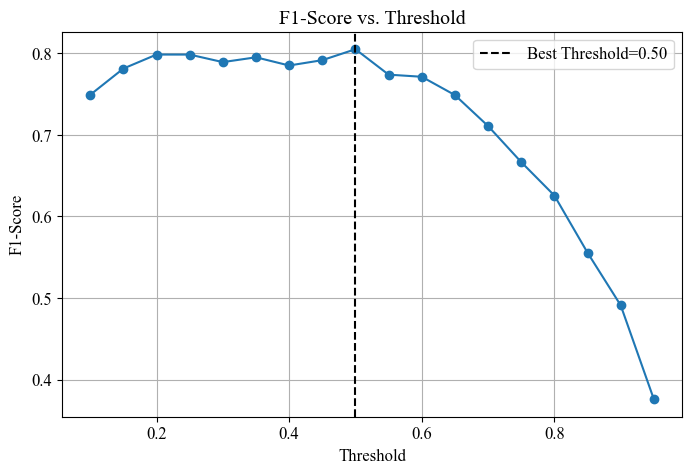

In [77]:
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt

# Get predicted probabilities for class 1 ("Unsafe")
probs = model.predict_proba(Xtest)[:, 1]

# Test thresholds from 0.1 to 0.9
thresholds = np.arange(0.1, 1.0, 0.05)
f1_scores = [f1_score(Ytest, probs >= t) for t in thresholds]

# Find the best threshold
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

print(f"Best threshold: {best_threshold:.2f}")
print(f"Best F1-score: {best_f1:.4f}")

# Plot F1-score vs. threshold
plt.figure(figsize=(8, 5))
plt.plot(thresholds, f1_scores, marker='o')
plt.axvline(best_threshold, color='k', linestyle='--', label=f'Best Threshold={best_threshold:.2f}')
plt.xlabel('Threshold')
plt.ylabel('F1-Score')
plt.title('F1-Score vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()

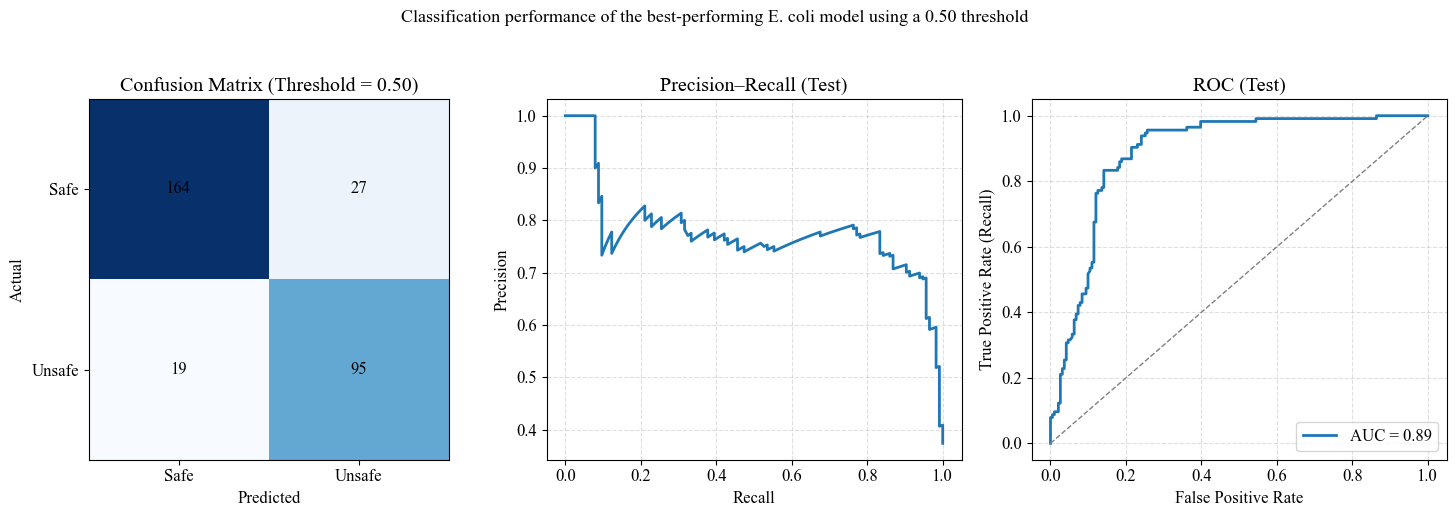

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix, precision_recall_curve, roc_curve, roc_auc_score
)

# --- Probabilities & hard labels at 0.50 ---
prob_test = model.predict_proba(Xtest)[:, 1]          # P(Unsafe)
y_pred_05 = (prob_test >= 0.50).astype(int)           # threshold = 0.50

# --- Confusion Matrix, PR, ROC ---
cm = confusion_matrix(Ytest, y_pred_05, labels=[0,1]) # rows: true, cols: pred
precision, recall, _ = precision_recall_curve(Ytest, prob_test)
fpr, tpr, _ = roc_curve(Ytest, prob_test)
auc_score = roc_auc_score(Ytest, prob_test)

# --- Plot (1×3) ---
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 1) Confusion Matrix (Left)
ax = axes[0]
im = ax.imshow(cm, interpolation='nearest', cmap='Blues')
for (i, j), v in np.ndenumerate(cm):
    ax.text(j, i, f"{v}", ha='center', va='center')
ax.set_xticks([0,1]); ax.set_xticklabels(['Safe', 'Unsafe'])
ax.set_yticks([0,1]); ax.set_yticklabels(['Safe', 'Unsafe'])
ax.set_xlabel('Predicted'); ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix (Threshold = 0.50)')
ax.grid(False)

# 2) Precision–Recall (Center)
ax = axes[1]
ax.plot(recall, precision, lw=2)
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Precision–Recall (Test)')
ax.grid(True, linestyle='--', alpha=0.4)

# 3) ROC (Right)
ax = axes[2]
ax.plot(fpr, tpr, lw=2, label=f'AUC = {auc_score:.2f}')
ax.plot([0,1], [0,1], '--', color='gray', lw=1)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate (Recall)')
ax.set_title('ROC (Test)')
ax.legend(loc='lower right')
ax.grid(True, linestyle='--', alpha=0.4)

fig.suptitle('Classification performance of the best-performing E. coli model using a 0.50 threshold', y=1.03, fontsize=13)
plt.tight_layout()
plt.savefig('classification_performance.png', dpi=600, bbox_inches='tight')
plt.show()

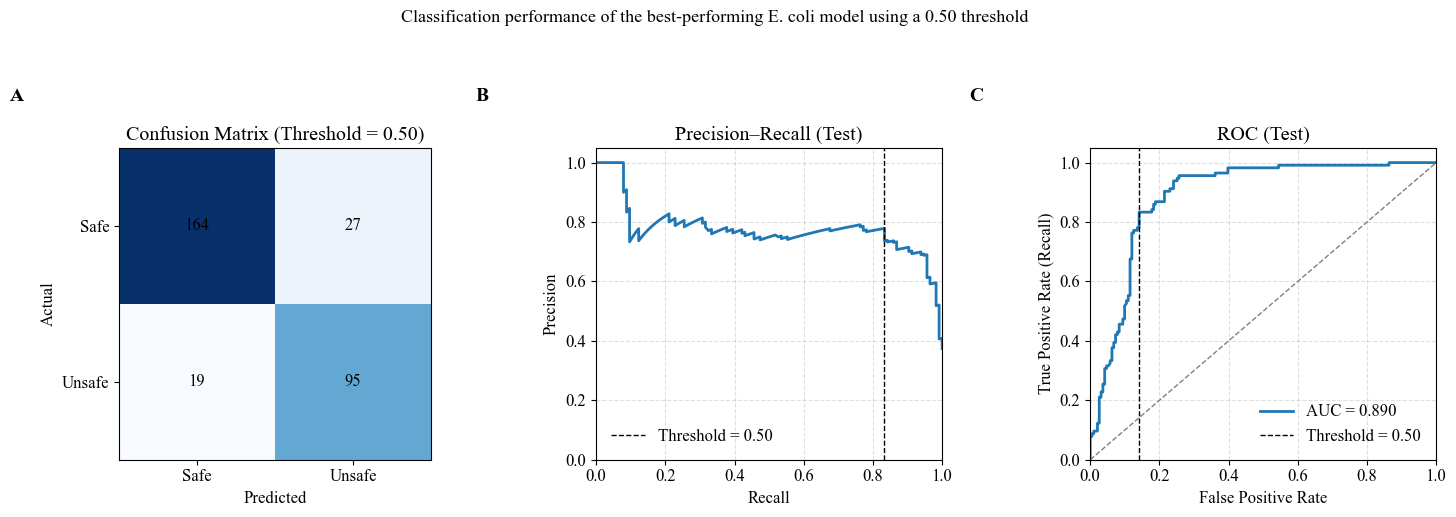

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix, precision_recall_curve, roc_curve, roc_auc_score
)

# --- Probabilities & labels ---
prob_test = model.predict_proba(Xtest)[:, 1]          # P(Unsafe)
y_pred_05 = (prob_test >= 0.50).astype(int)

# --- Metrics/curves ---
cm = confusion_matrix(Ytest, y_pred_05, labels=[0,1])
precision, recall, pr_th = precision_recall_curve(Ytest, prob_test)  # pr_th has len = len(precision)-1
fpr, tpr, roc_th = roc_curve(Ytest, prob_test)                        # roc_th aligns with fpr/tpr
auc_score = roc_auc_score(Ytest, prob_test)

# --- Map threshold=0.50 to vertical positions on PR/ROC ---
thr = 0.50
# PR: find recall at chosen threshold
idx_pr = np.argmin(np.abs(pr_th - thr))  # pr_th length = len(precision)-1
recall_at_thr = recall[idx_pr]           # x-position for PR vertical line

# ROC: find FPR at chosen threshold
idx_roc = np.argmin(np.abs(roc_th - thr))
fpr_at_thr = fpr[idx_roc]                # x-position for ROC vertical line

# --- Styling ---
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# (A) Confusion Matrix
ax = axes[0]
im = ax.imshow(cm, interpolation='nearest', cmap='Blues')
for (i, j), v in np.ndenumerate(cm):
    ax.text(j, i, f"{v}", ha='center', va='center')
ax.set_xticks([0,1]); ax.set_xticklabels(['Safe', 'Unsafe'])
ax.set_yticks([0,1]); ax.set_yticklabels(['Safe', 'Unsafe'])
ax.set_xlabel('Predicted'); ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix (Threshold = 0.50)')
ax.grid(False)
ax.text(-0.35, 1.15, 'A', transform=ax.transAxes, fontsize=14, fontweight='bold')

# (B) Precision–Recall
ax = axes[1]
ax.plot(recall, precision, lw=2)
ax.axvline(recall_at_thr, linestyle='--', color='k', lw=1, label='Threshold = 0.50')
ax.set_xlim(0, 1); ax.set_ylim(0, 1.05)
ax.set_xlabel('Recall'); ax.set_ylabel('Precision')
ax.set_title('Precision–Recall (Test)')
ax.grid(True, linestyle='--', alpha=0.4)
ax.legend(frameon=False, loc='lower left')
ax.text(-0.35, 1.15, 'B', transform=ax.transAxes, fontsize=14, fontweight='bold')

# (C) ROC
ax = axes[2]
ax.plot(fpr, tpr, lw=2, label=f'AUC = {auc_score:.3f}')
ax.plot([0, 1], [0, 1], '--', color='gray', lw=1)
ax.axvline(fpr_at_thr, linestyle='--', color='k', lw=1, label='Threshold = 0.50')
ax.set_xlim(0, 1); ax.set_ylim(0, 1.05)
ax.set_xlabel('False Positive Rate'); ax.set_ylabel('True Positive Rate (Recall)')
ax.set_title('ROC (Test)')
ax.legend(frameon=False, loc='lower right')
ax.grid(True, linestyle='--', alpha=0.4)
ax.text(-0.35, 1.15, 'C', transform=ax.transAxes, fontsize=14, fontweight='bold')

fig.suptitle('Classification performance of the best-performing E. coli model using a 0.50 threshold', y=1.03, fontsize=13)
plt.tight_layout()
plt.savefig('classification_performance_final.png', dpi=600, bbox_inches='tight')
plt.show()


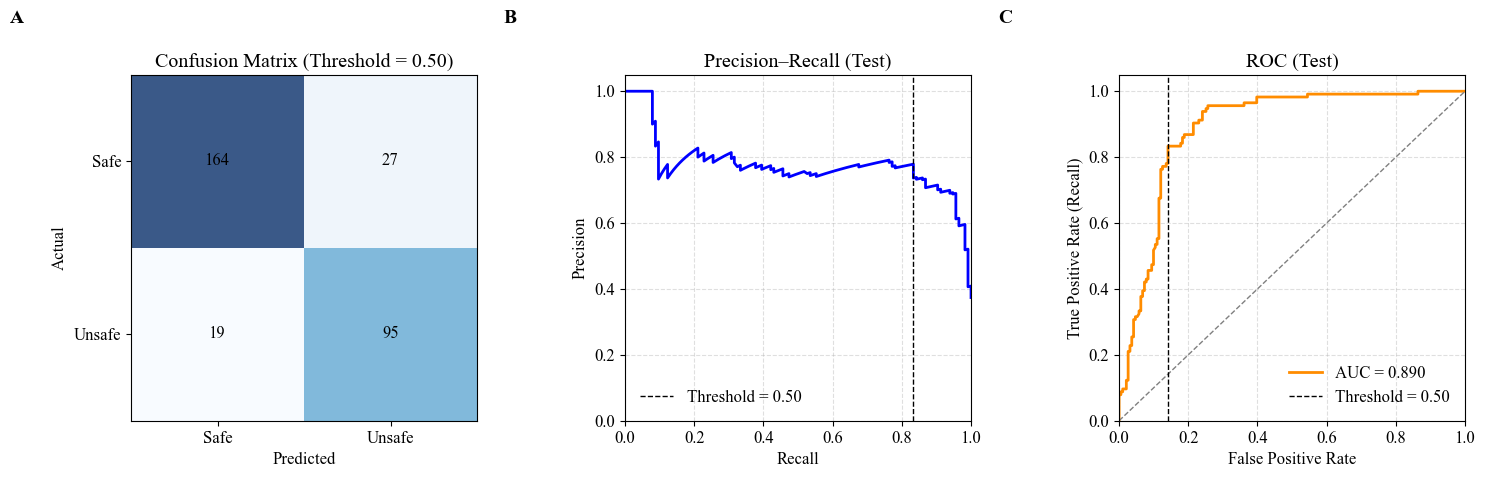

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, roc_auc_score

# --- Probabilities & labels ---
prob_test = model.predict_proba(Xtest)[:, 1]          # P(Unsafe)
y_pred_05 = (prob_test >= 0.50).astype(int)

# --- Metrics/curves ---
cm = confusion_matrix(Ytest, y_pred_05, labels=[0,1])
precision, recall, pr_th = precision_recall_curve(Ytest, prob_test)
fpr, tpr, roc_th = roc_curve(Ytest, prob_test)
auc_score = roc_auc_score(Ytest, prob_test)

# --- Threshold = 0.50 positions ---
thr = 0.50
idx_pr = np.argmin(np.abs(pr_th - thr))
recall_at_thr = recall[idx_pr]
idx_roc = np.argmin(np.abs(roc_th - thr))
fpr_at_thr = fpr[idx_roc]

# --- Styling ---
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# (A) Confusion Matrix
ax = axes[0]
# make colormap lighter
cmap = plt.cm.Blues
im = ax.imshow(cm, interpolation='nearest', cmap=cmap, alpha=0.8)  # alpha < 1 makes it lighter
for (i, j), v in np.ndenumerate(cm):
    ax.text(j, i, f"{v}", ha='center', va='center')
ax.set_xticks([0,1]); ax.set_xticklabels(['Safe', 'Unsafe'])
ax.set_yticks([0,1]); ax.set_yticklabels(['Safe', 'Unsafe'])
ax.set_xlabel('Predicted'); ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix (Threshold = 0.50)')
ax.grid(False)
ax.text(-0.35, 1.15, 'A', transform=ax.transAxes, fontsize=14, fontweight='bold')

# (B) Precision–Recall
ax = axes[1]
ax.plot(recall, precision, lw=2, color='blue')
ax.axvline(recall_at_thr, linestyle='--', color='k', lw=1, label='Threshold = 0.50')
ax.set_xlim(0, 1); ax.set_ylim(0, 1.05)
ax.set_xlabel('Recall'); ax.set_ylabel('Precision')
ax.set_title('Precision–Recall (Test)')
ax.grid(True, linestyle='--', alpha=0.4)
ax.legend(frameon=False, loc='lower left')
ax.text(-0.35, 1.15, 'B', transform=ax.transAxes, fontsize=14, fontweight='bold')

# (C) ROC
ax = axes[2]
ax.plot(fpr, tpr, lw=2, color='darkorange', label=f'AUC = {auc_score:.3f}')  # <- orange ROC
ax.plot([0, 1], [0, 1], '--', color='gray', lw=1)
ax.axvline(fpr_at_thr, linestyle='--', color='k', lw=1, label='Threshold = 0.50')
ax.set_xlim(0, 1); ax.set_ylim(0, 1.05)
ax.set_xlabel('False Positive Rate'); ax.set_ylabel('True Positive Rate (Recall)')
ax.set_title('ROC (Test)')
ax.legend(frameon=False, loc='lower right')
ax.grid(True, linestyle='--', alpha=0.4)
ax.text(-0.35, 1.15, 'C', transform=ax.transAxes, fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('classification_performance_final.png', dpi=600, bbox_inches='tight')
plt.show()


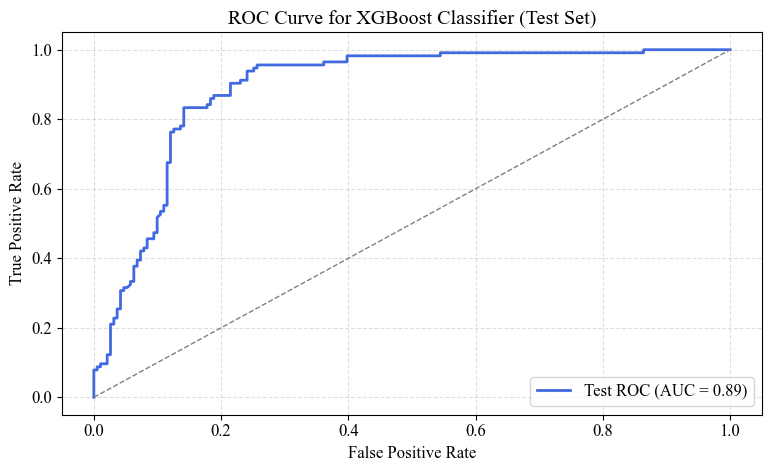

In [81]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# === Predict Probabilities (only test) ===
y_score_test = model.predict_proba(Xtest)[:, 1]

# === Compute ROC Curve (only test) ===
fpr_test, tpr_test, _ = roc_curve(Ytest, y_score_test)

# === Compute AUC (only test) ===
auc_test = auc(fpr_test, tpr_test)

# === Plot ROC for Test Set ===
plt.figure(figsize=(8, 5))
plt.plot(fpr_test, tpr_test, label=f'Test ROC (AUC = {auc_test:.2f})', color='royalblue', lw=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=1)

# Axis and styling
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost Classifier (Test Set)')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.4)

# Optional Nature-style font
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 16

plt.tight_layout()
plt.savefig('xgb_classifier_auc_roc_test.png', dpi=600, bbox_inches='tight')
plt.show()


In [ ]:
import joblib

# Save model
joblib.dump(model, 'xgb_ecoli_model.pkl')

# Save final feature names
joblib.dump(final_features, 'final_features.pkl')

['final_features.pkl']

In [ ]:
import joblib

# Save the trained model to a file
joblib.dump(model, 'xgb_ecoli_classifier.pkl')


['xgb_ecoli_classifier.pkl']

In [ ]:
# Save the model using XGBoost's built-in method (recommended)
model.save_model("xgb_ecoli_classifier.json")  # You can also use .model


In [ ]:
train_dates = train_set['Date'].reset_index(drop=True)
test_dates = test_set['Date'].reset_index(drop=True)


In [ ]:
# Train predictions
df_train_clf = pd.DataFrame({
    'Date': train_dates,
    'Observed_Train_Label': Ytrain.reset_index(drop=True),
    'Predicted_Train_Label': y_pred_train
})

# Test predictions
df_test_clf = pd.DataFrame({
    'Date': test_dates,
    'Observed_Test_Label': Ytest.reset_index(drop=True),
    'Predicted_Test_Label': y_pred_test
})


In [ ]:
df_train_clf.to_csv('xgb_classifier_train_predictions.csv', index=False)
df_test_clf.to_csv('xgb_classifier_test_predictions.csv', index=False)

In [ ]:
df_train_clf['Set'] = 'Train'
df_test_clf['Set'] = 'Test'

df_xgb_clf_all = pd.concat([
    df_train_clf.rename(columns={
        'Observed_Train_Label': 'Observed_Label',
        'Predicted_Train_Label': 'Predicted_Label'
    }),
    df_test_clf.rename(columns={
        'Observed_Test_Label': 'Observed_Label',
        'Predicted_Test_Label': 'Predicted_Label'
    })
], ignore_index=True)

df_xgb_clf_all.to_csv('xgb_classifier_all_predictions.csv', index=False)


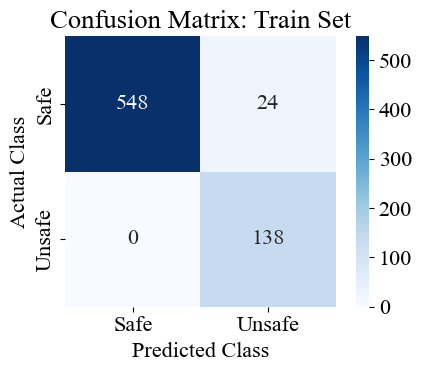

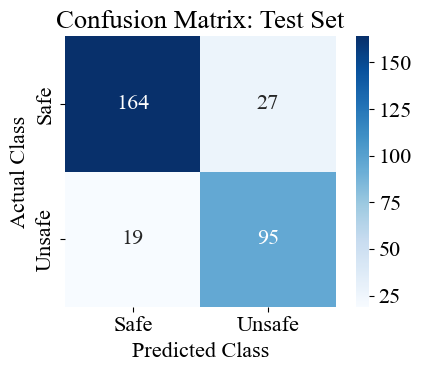

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True,
                xticklabels=['Safe', 'Unsafe'], yticklabels=['Safe', 'Unsafe'])
    plt.xlabel('Predicted Class')
    plt.ylabel('Actual Class')
    plt.title(f'Confusion Matrix: {title}')
    plt.tight_layout()
    plt.show()

plot_conf_matrix(Ytrain, y_pred_train, "Train Set")
plot_conf_matrix(Ytest, y_pred_test, "Test Set")


# Features Interpretability

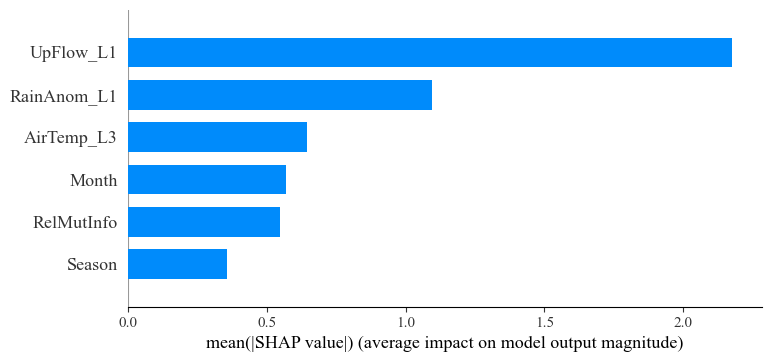

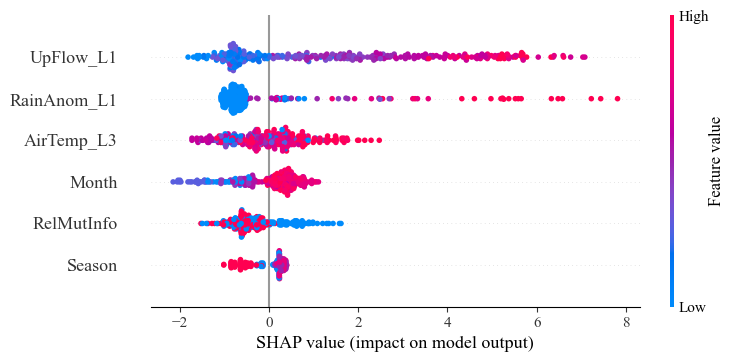

In [83]:
import shap
import matplotlib.pyplot as plt

# Initialize the SHAP explainer
explainer = shap.Explainer(model, Xtrain)

# Calculate SHAP values for the test set
shap_values = explainer(Xtest)

# Plot SHAP summary for test data
shap.summary_plot(shap_values, Xtest, plot_type="bar")  # bar plot
shap.summary_plot(shap_values, Xtest)  # dot plot


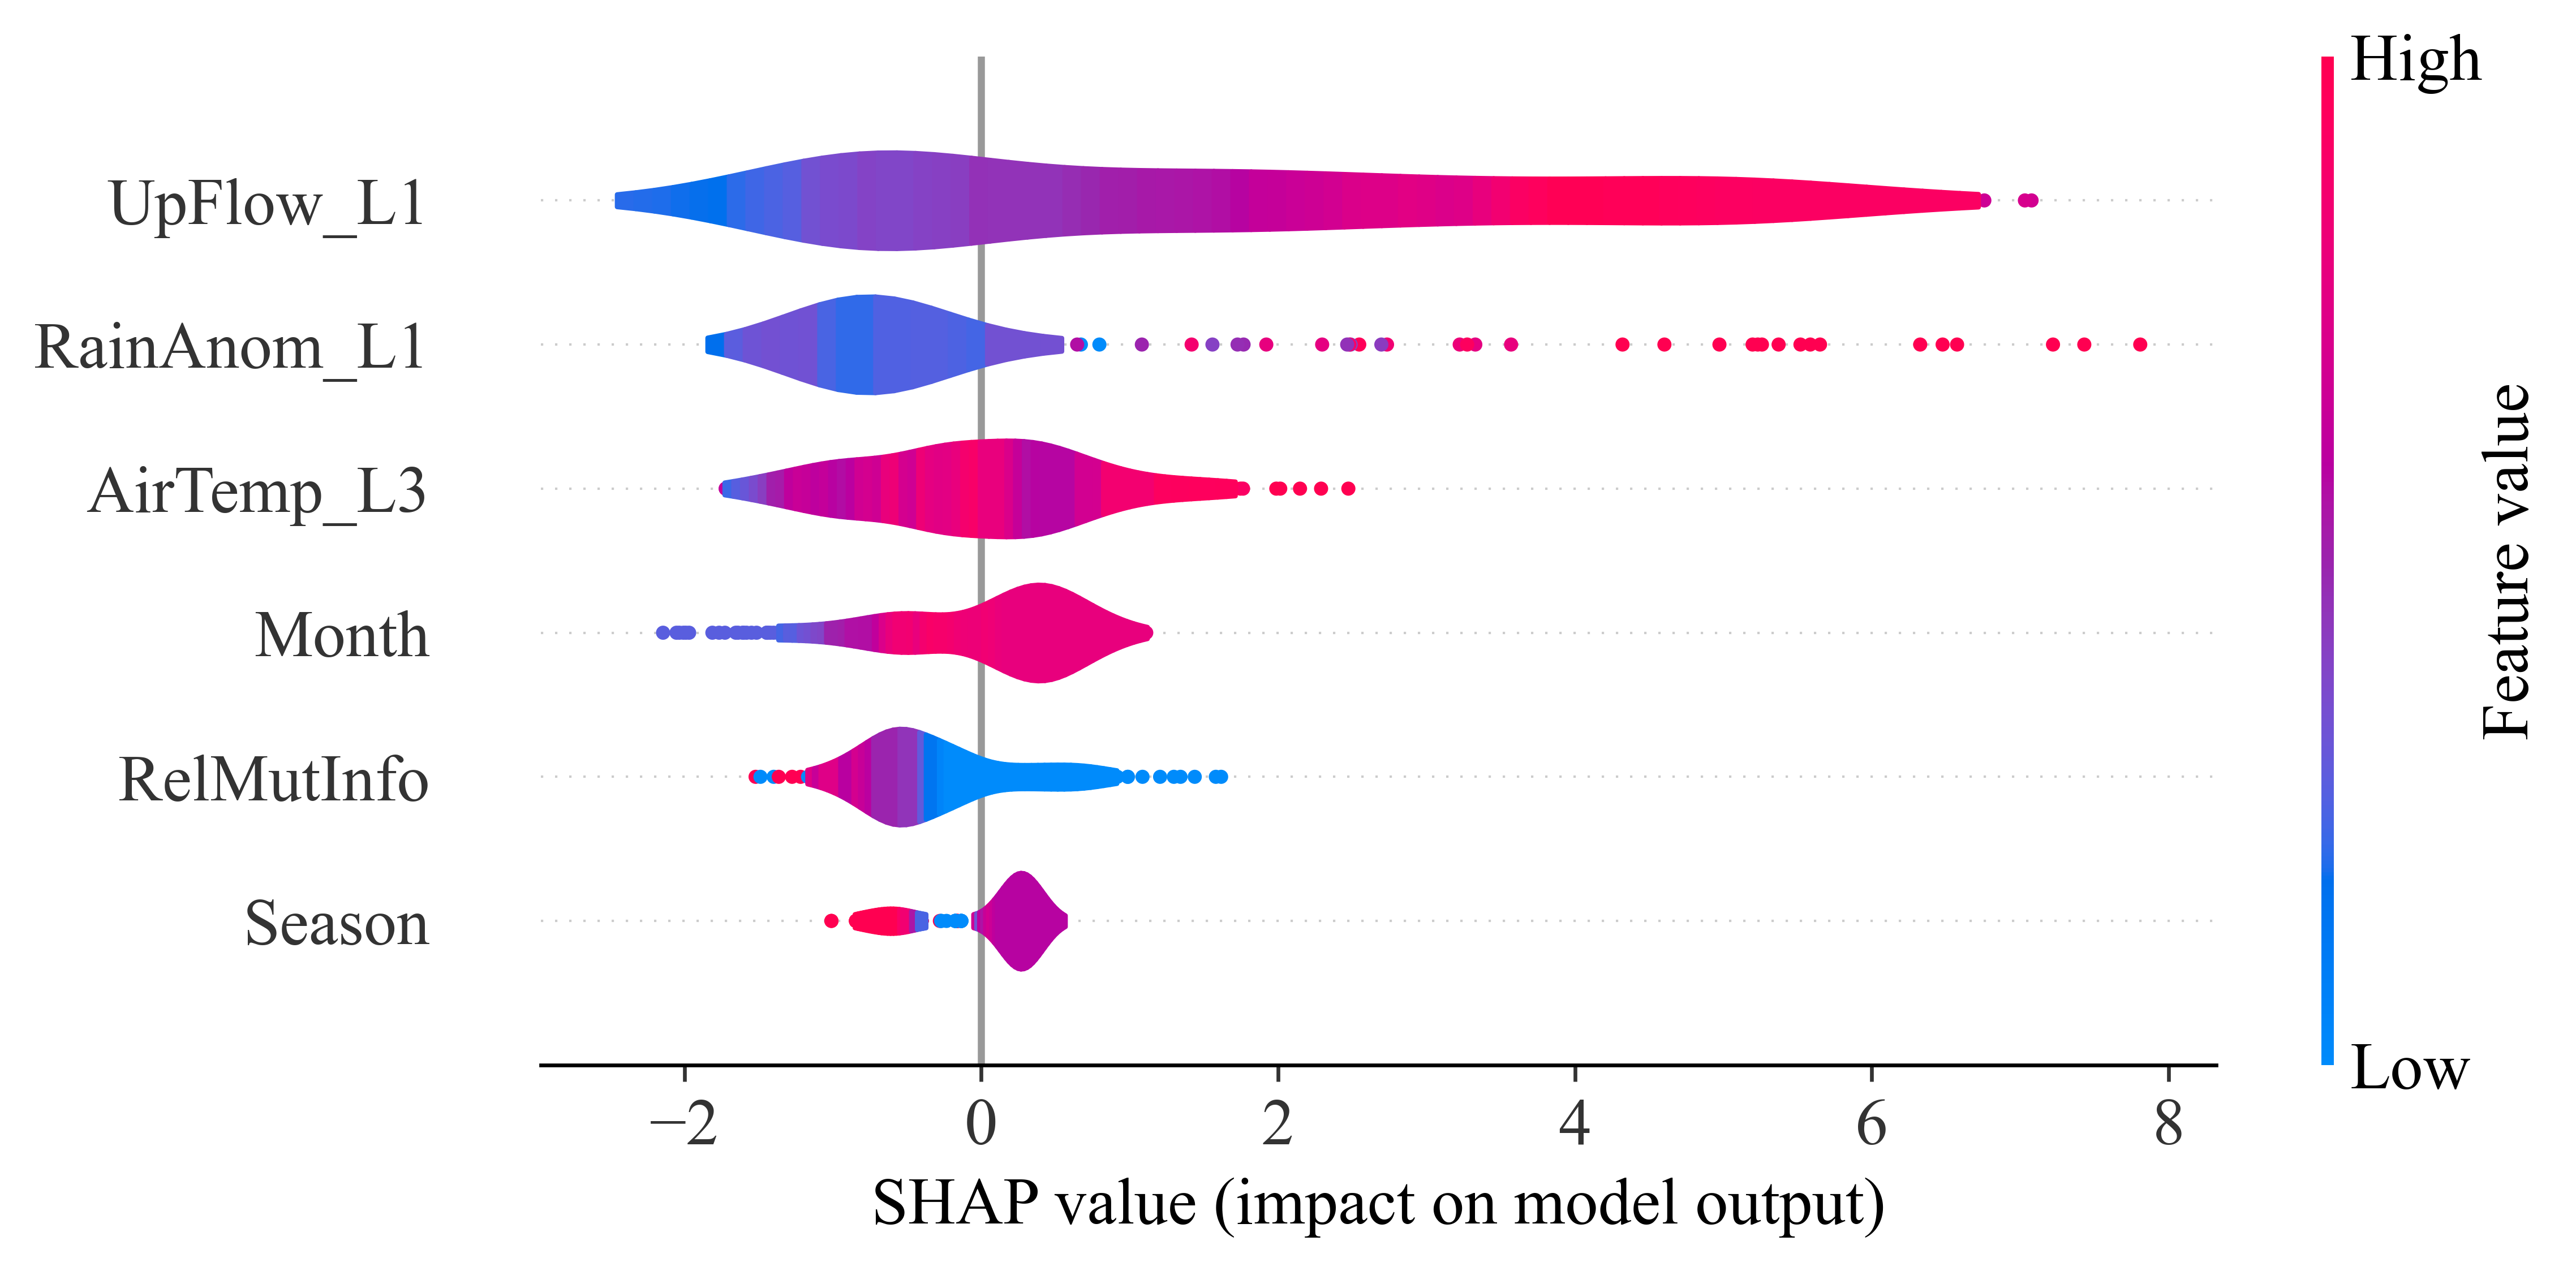

In [84]:
import shap
import matplotlib.pyplot as plt

# Global font settings
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size']   = 14

#  Compute SHAP values 
explainer   = shap.Explainer(model, Xtrain)
shap_values = explainer(Xtest)


plt.figure(figsize=(16, 8), dpi=600)   # <-- increase to 16"x12" at 600 dpi
shap.summary_plot(shap_values, Xtest, plot_type="violin", show=False)


fig = plt.gcf()
for ax in fig.axes:
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    lbl = ax.get_xlabel()
    if lbl:
        ax.set_xlabel(lbl, fontsize=14)
    lbl = ax.get_ylabel()
    if lbl:
        ax.set_ylabel(lbl, fontsize=14)

#  Save and show
plt.savefig("shap_violin_plot_classification.png", bbox_inches='tight', dpi=600)
plt.show()


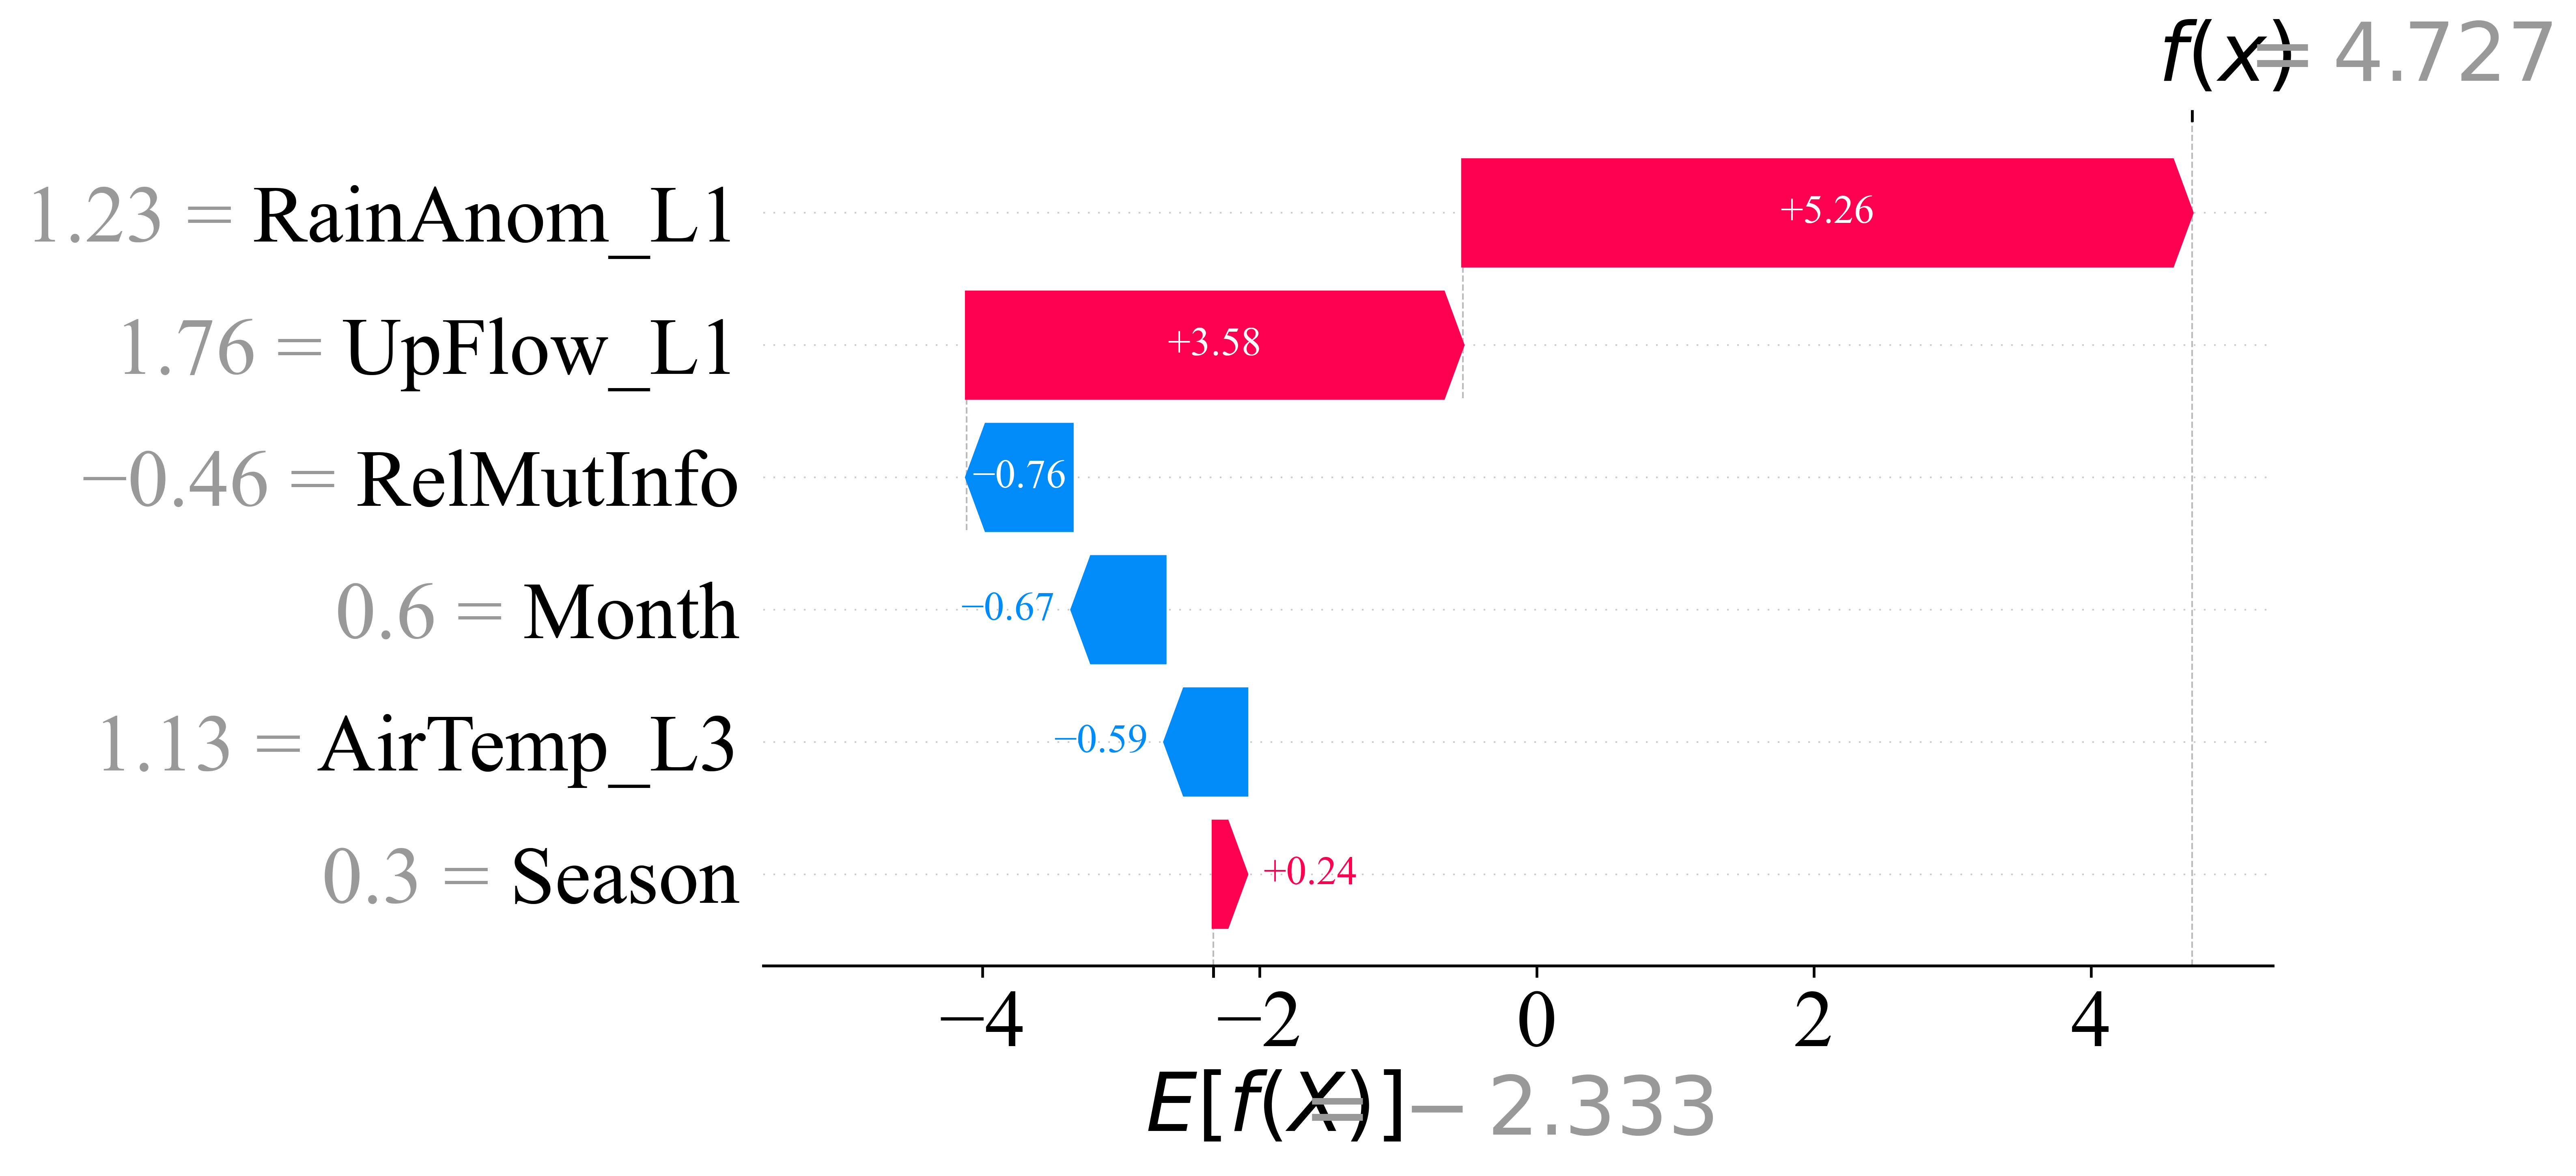

In [85]:
import numpy as np
import shap
import matplotlib.pyplot as plt
from matplotlib import rcParams

#  GLOBAL FONT SETTINGS 
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Times New Roman']
rcParams['font.size'] = 24


rounded_shap_values = np.round(shap_values.values[57], 2)
rounded_base_value = shap_values.base_values[57]
rounded_input_data = Xtest.iloc[57].round(2)

shap_explanation = shap.Explanation(
    values=rounded_shap_values,
    base_values=rounded_base_value,
    data=rounded_input_data
)


plt.figure(dpi=600)
shap.waterfall_plot(shap_explanation, show=False)


for ax in plt.gcf().axes:
    for label in ax.get_xticklabels():
        label.set_fontsize(24)
    for label in ax.get_yticklabels():
        label.set_fontsize(24)


for ax in plt.gcf().axes:
    # ax.texts is a list of all Text objects drawn in this axis
    for txt in list(ax.texts):
        txt_text = txt.get_text()
        # If the text contains either "f(x)" or "E[f(X)]", hide it
        if "f(x)" in txt_text or "E[f(X)]" in txt_text:
            txt.set_visible(False)


plt.savefig(
    "shap_waterfall_plot_row57_classification.png",
    bbox_inches='tight',
    dpi=600
)
plt.show()


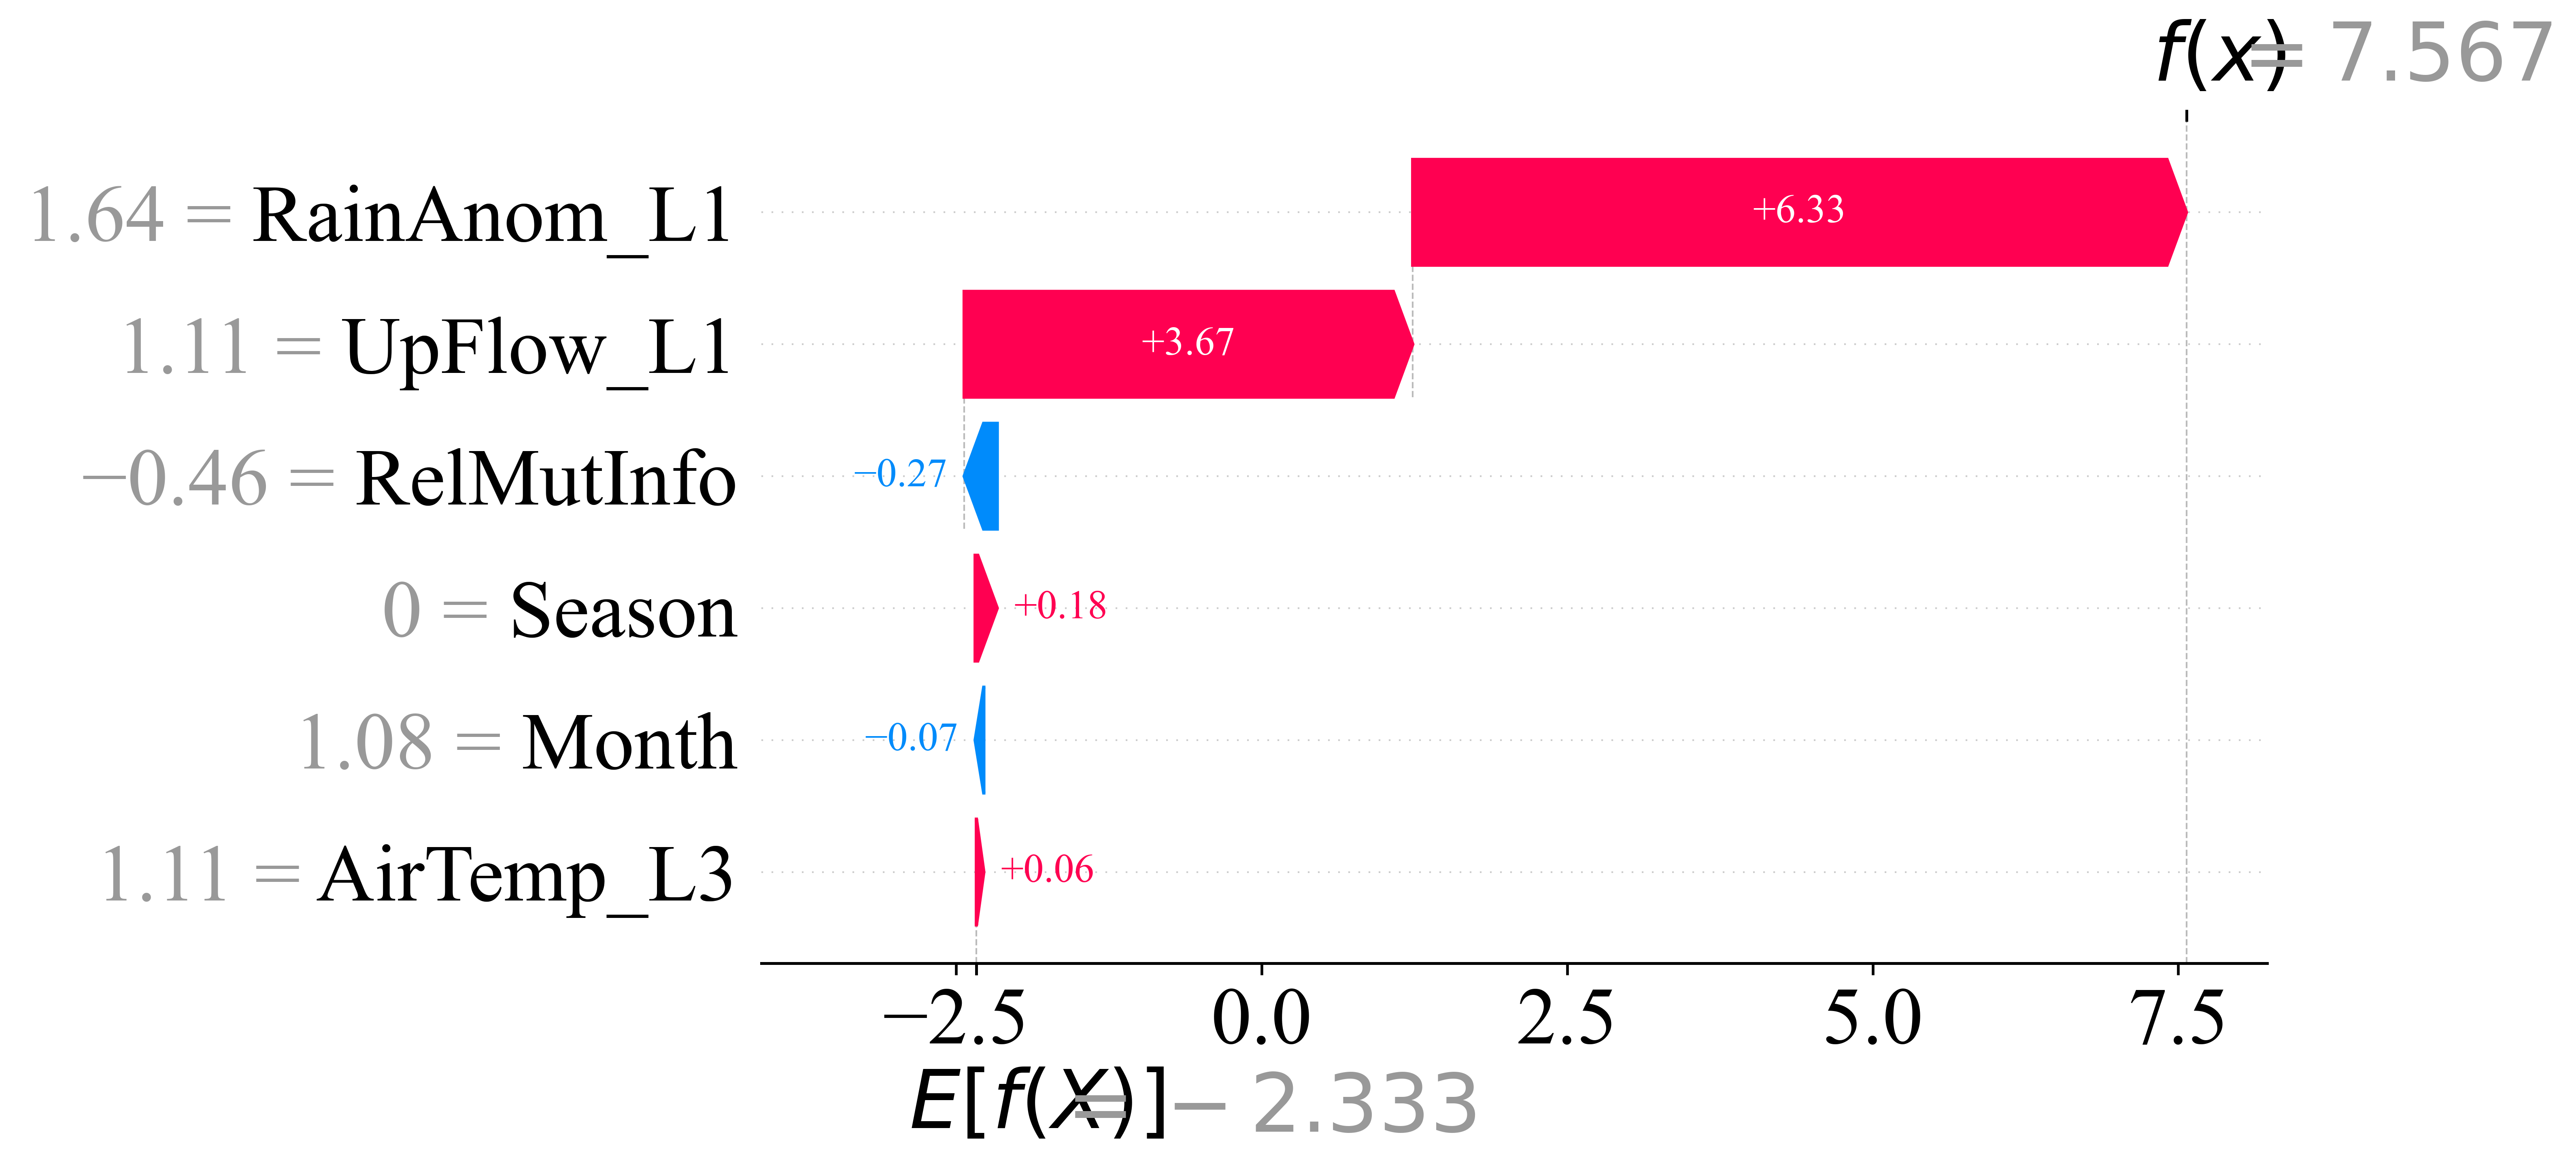

In [86]:
import numpy as np
import shap
import matplotlib.pyplot as plt
from matplotlib import rcParams


rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']

rcParams['font.size'] = 24


predicted_values = shap_values.base_values + shap_values.values.sum(axis=1)
high_extreme_index = np.argmax(predicted_values)


rounded_shap_values = np.round(shap_values.values[high_extreme_index], 2)
rounded_base_value = shap_values.base_values[high_extreme_index]
rounded_input_data = Xtest.iloc[high_extreme_index].round(2)


shap_explanation = shap.Explanation(
    values=rounded_shap_values,
    base_values=rounded_base_value,
    data=rounded_input_data
)


fig = plt.figure(dpi=600)
shap.waterfall_plot(shap_explanation, show=False)


for ax in fig.axes:
   
    ax.tick_params(axis='x', labelsize=24)
    ax.tick_params(axis='y', labelsize=24)
    

    xlabel = ax.get_xlabel()
    if xlabel:
        ax.set_xlabel(xlabel, fontsize=24)
    ylabel = ax.get_ylabel()
    if ylabel:
        ax.set_ylabel(ylabel, fontsize=24)


plt.savefig("Classificationshap_waterfall_plot_high_extreme.png", bbox_inches='tight', dpi=600)
plt.show()


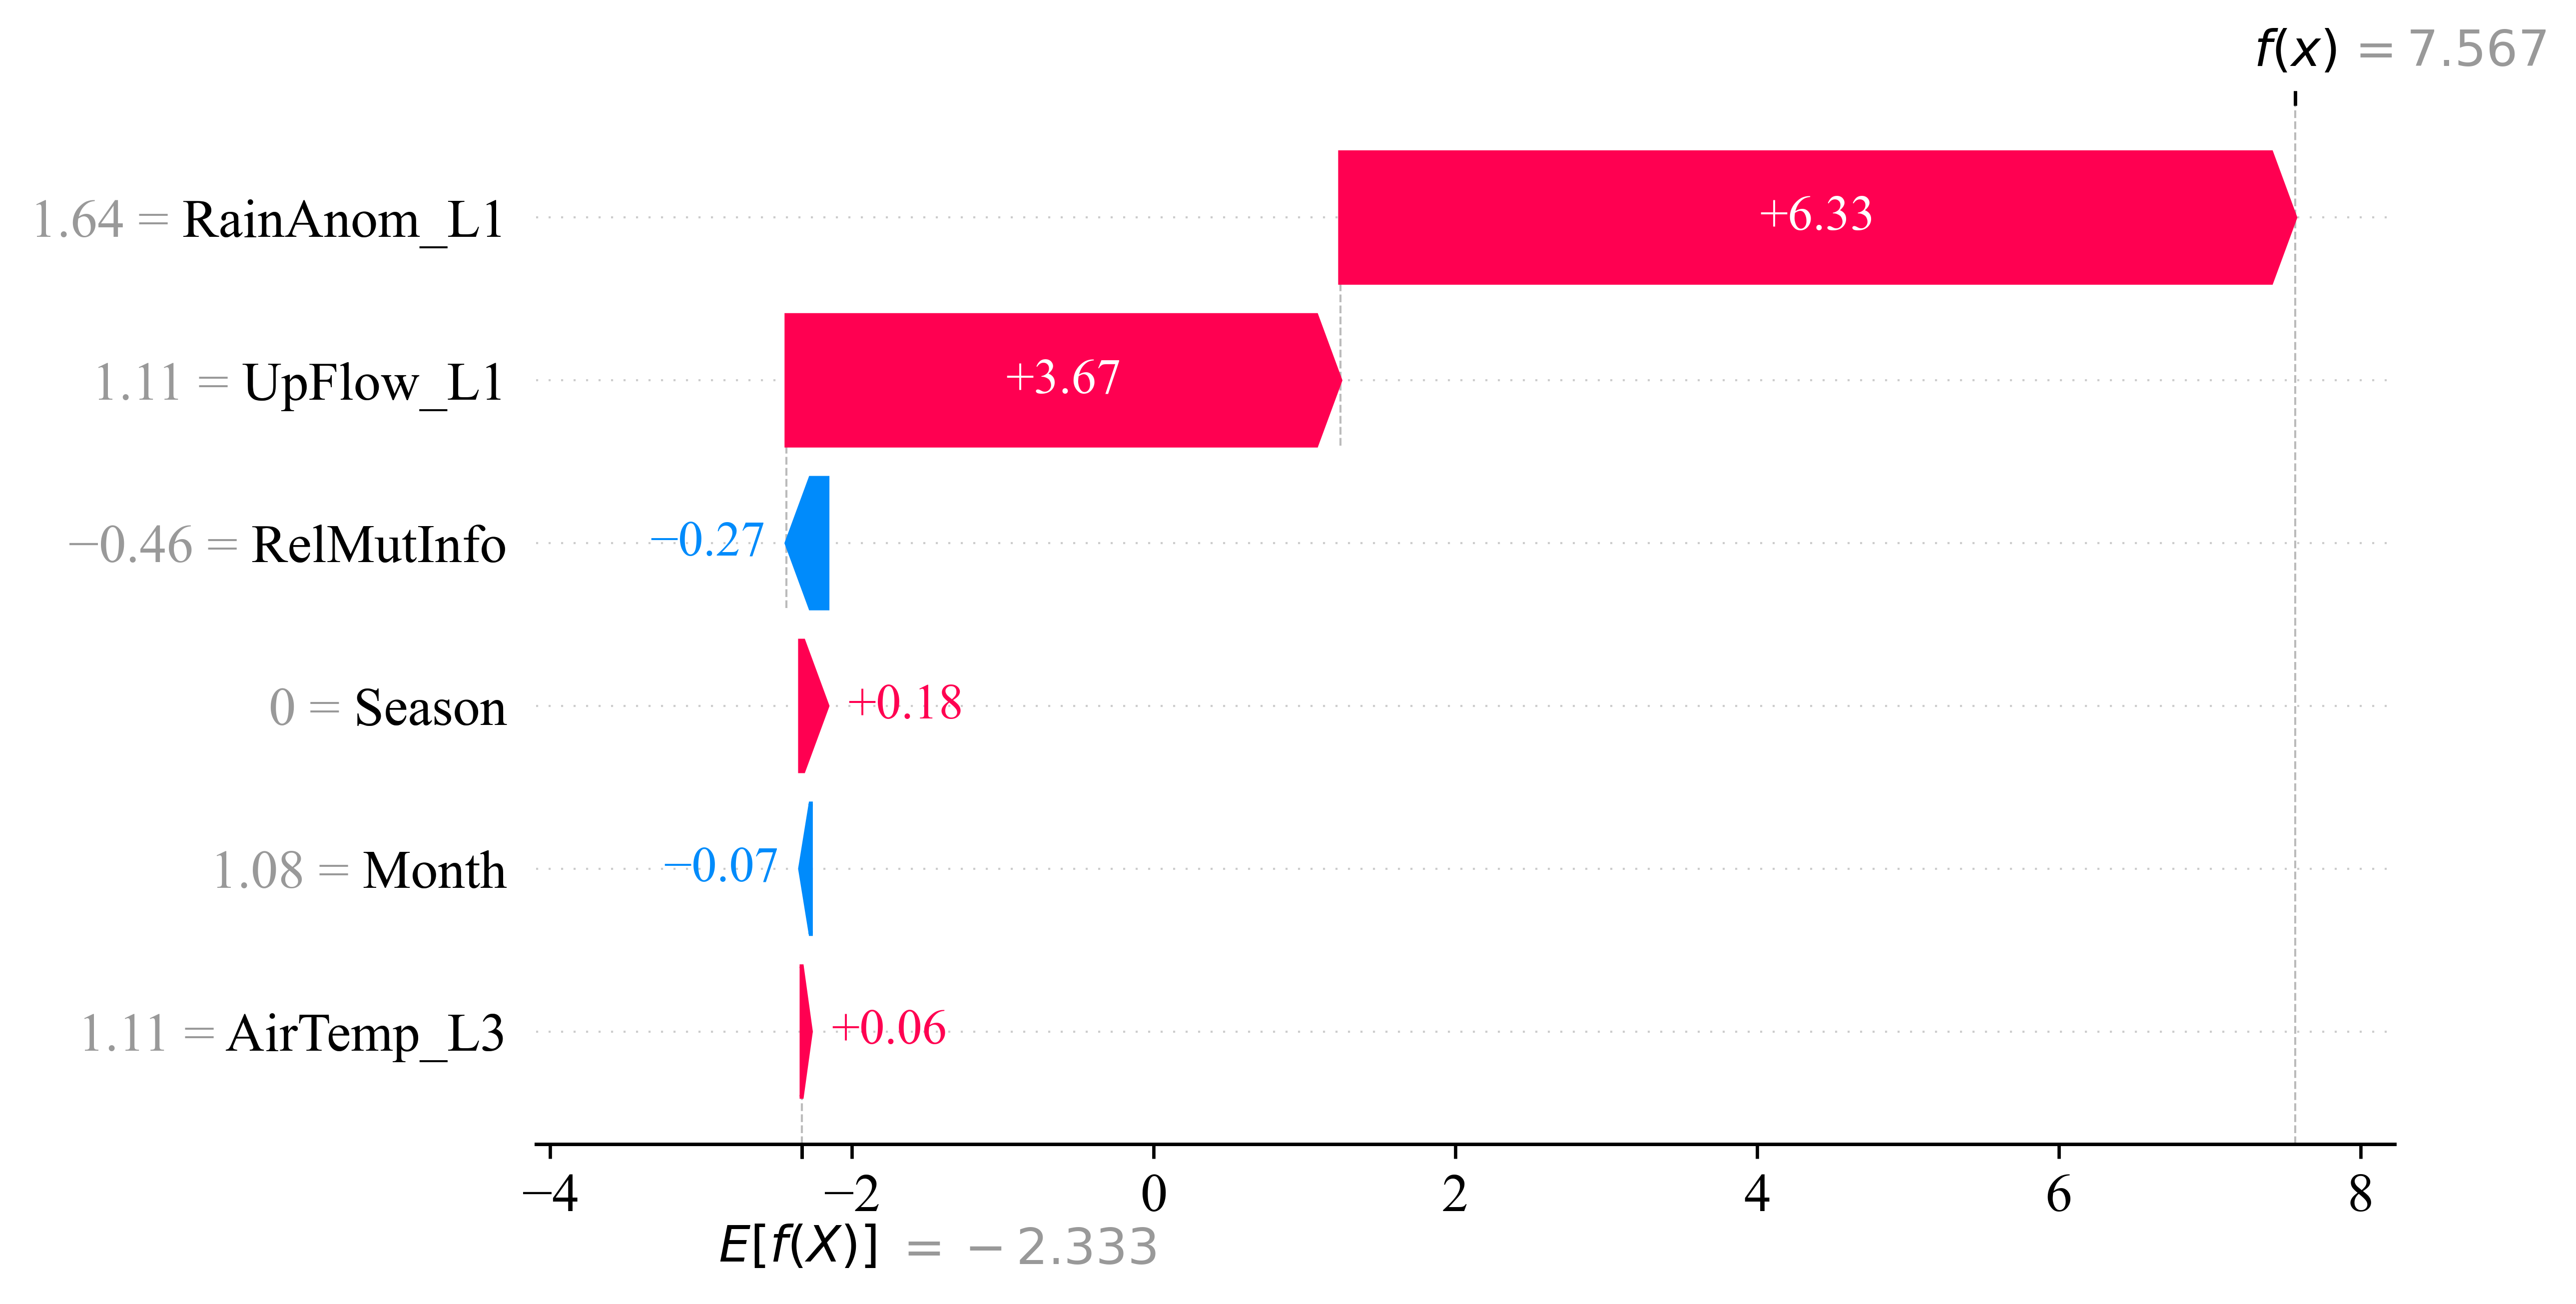

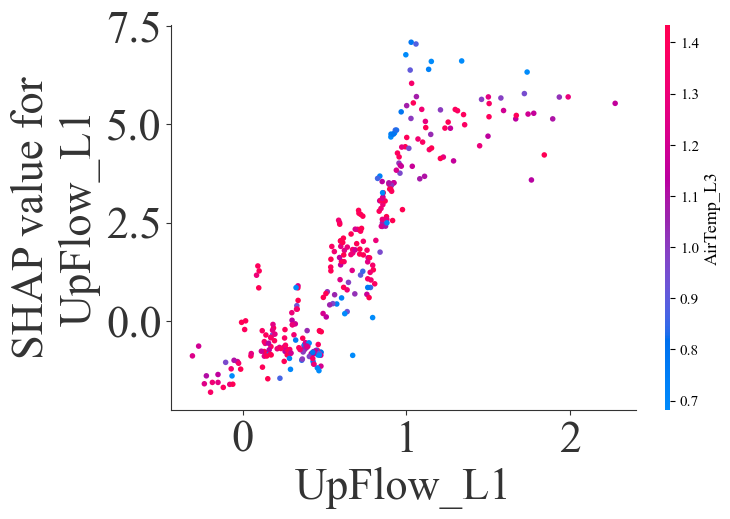

<Figure size 640x480 with 0 Axes>

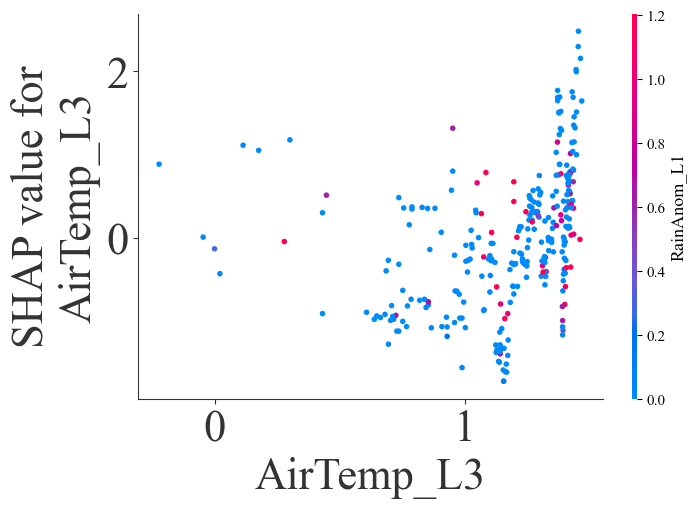

<Figure size 640x480 with 0 Axes>

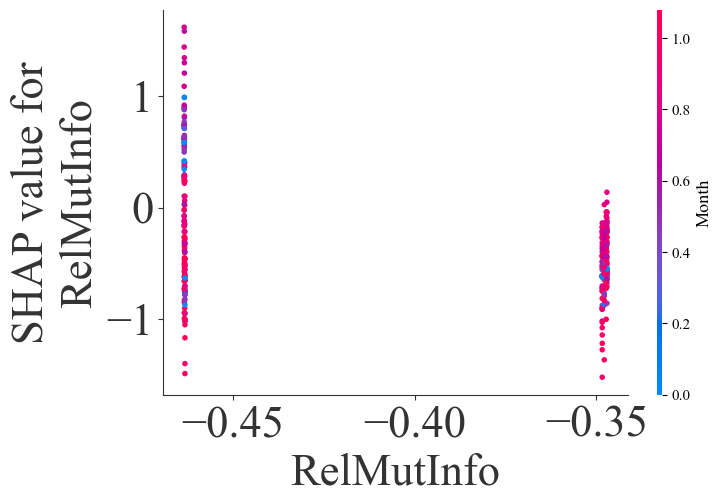

<Figure size 640x480 with 0 Axes>

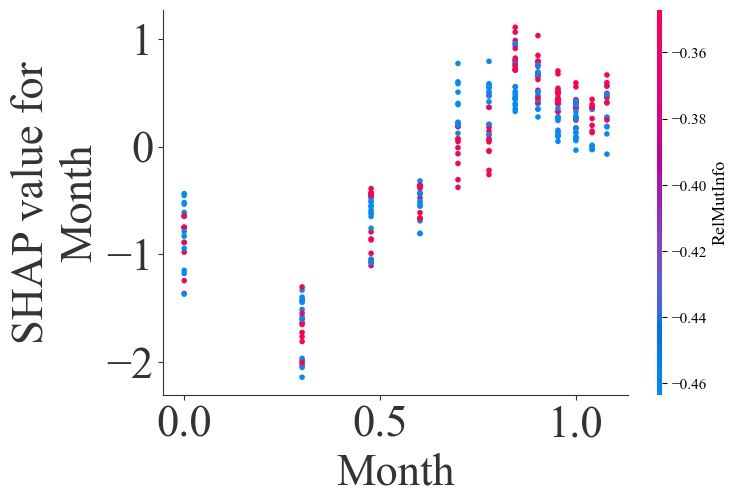

<Figure size 640x480 with 0 Axes>

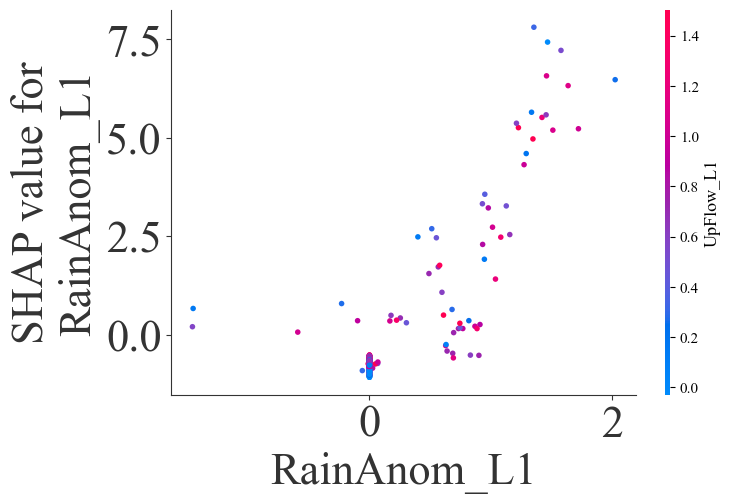

<Figure size 640x480 with 0 Axes>

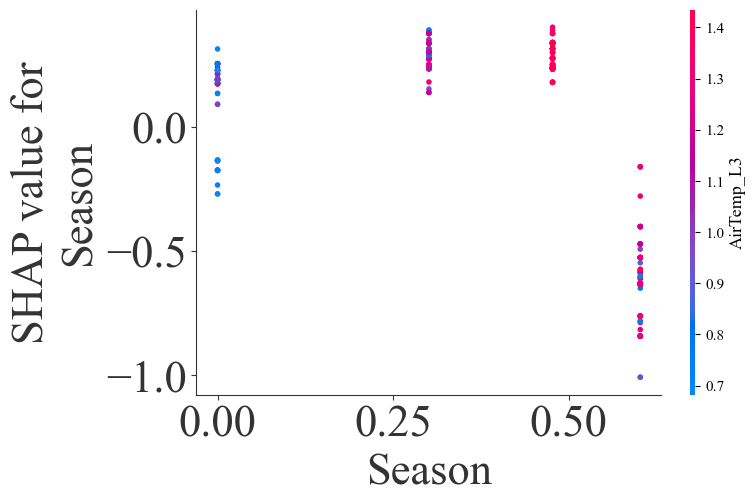

In [87]:
import numpy as np
import shap
import matplotlib.pyplot as plt
import os
from matplotlib import rcParams
import pandas as pd

rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']
rcParams['font.size'] = 32

save_dir = r"C:Data\classification"
dependence_plot_dir = os.path.join(save_dir, "shap_dependence_plots")
os.makedirs(dependence_plot_dir, exist_ok=True)


predicted_values = shap_values.base_values + shap_values.values.sum(axis=1)
high_extreme_index = np.argmax(predicted_values)


rounded_shap_values = np.round(shap_values.values[high_extreme_index], 2)
rounded_base_value = shap_values.base_values[high_extreme_index]
rounded_input_data = Xtest.iloc[high_extreme_index].round(2)


shap_explanation = shap.Explanation(values=rounded_shap_values,
                                    base_values=rounded_base_value,
                                    data=rounded_input_data)


waterfall_path = os.path.join(save_dir, "shap_waterfall_plot_high_extreme.png")
plt.figure(dpi=600)
shap.waterfall_plot(shap_explanation, show=False)
plt.savefig(waterfall_path, bbox_inches='tight', dpi=600)
plt.show()


Xtest = pd.DataFrame(Xtest)
os.makedirs("shap_dependence_plots", exist_ok=True)

for feature in Xtest.columns:
    shap.dependence_plot(
        feature,
        shap_values.values,
        Xtest,
        show=False
    )

    ax = plt.gca()
    ax.title.set_fontsize(32)
    ax.title.set_fontname('Times New Roman')
    ax.xaxis.label.set_fontsize(32)
    ax.xaxis.label.set_fontname('Times New Roman')
    ax.yaxis.label.set_fontsize(32)
    ax.yaxis.label.set_fontname('Times New Roman')
    ax.tick_params(axis='both', labelsize=32)

    # Save 
    filename = f"SHAP_dependence_{feature.replace('/', '_').replace(' ', '_')}.png"
    save_path = os.path.join(dependence_plot_dir, filename)
    plt.savefig(save_path, bbox_inches='tight', dpi=600)
    plt.show()
    plt.clf()